# Regression Predict - 2301FTDS_Team_GM4_#TheOutliers

© Explore Data Science Academy

---
### Honour Code

I {**Kobus le Roux, Ayanda Shilakoe, Prayer Lungile Nkuna, Fikile Lubambo, Karabo Hlatswayo, Esethu Mpetshwa**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 


<a id="cont"></a>

## Table of Contents
<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a href=#nine>9. Appendix A: Model Deployment via API</a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

The provision of electricity plays a significant role in the well-being of most, if not all citizens within a nation. Electricity serves multiple purposes, such as keeping us connected, providing warmth, and enabling us to provide for our families. Consequently, it is essential to ensure a consistent power supply in order to maintain and enhance living standards by investing in electricity infrastructure. However, recent years have revealed evidence indicating that relying solely on non-renewable sources is not environmentally sustainable.

The Spanish government is contemplating an expansion of investments in renewable energy resources. Consequently, they require information regarding the trends and patterns of renewable and fossil fuel energy generation in the country. To fulfill this purpose, the Spanish government has been monitoring the various energy sources available within their borders.

The purpose of this document is to investigate and model the difference between energy generated through fossil fuels and various renewable sources in Spain. This disparity, referred to as the target variable, will be modeled based on city-specific weather features, including pressure, wind speed, humidity, and more, on a daily basis.


**The Dataset:**

The dataset provided to accomplish this goal contains information about the weather conditions in various Spanish cities: Madrid, Valencia, Seville, Bilbao and Barcelona. The dataset also contains the three hour load shortfall (`load_shortfall_3h`), defined as the difference between the energy generated by the method of renewable energy sources, such as solar, wind, geothermal, etc., and energy generated with fossil fuels - partitioned in three-hour windows. All the data was collected between the years 2015 and 2017

 <a id="two"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we will import and briefly discuss the libraries that will be used throughout our analysis and modelling. We will also set some display options and styles for certain packages|

---

In [1]:
# Libraries for data loading, data manipulation and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries that helps with statistical methods and visualizations
from  scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import norm

# Libraries for data preparation and model building
from sklearn import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
import catboost as cb 
from sklearn.inspection import permutation_importance

# Miscellaneous libraries also used throughout notebook
import pickle
import calendar
import re
# Ignore filterwarnings
import warnings
warnings.filterwarnings('ignore')

# Setting global constants to ensure notebook results are reproducible
TRAIN_TEST_VAR = 0.2 #Variable indicating the ratio of Training to Testing data when splitting datasets for validation
K_FOLD = 10 #Variable used during k-fold validation processes
RAND_STATE = 42 #Variable used to determine random state of methods in order to replicate model training results



# Setting display options and styles for "Pandas" and "Seaborne" libraries
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set_style('whitegrid')


It would also be beneficial to write a quick function for calculating the Root Mean Square Error, which will be used when assessing model performance:

In [2]:
# Function that returns the RMSE
def rmse(y_real, y_predicted):
    return np.sqrt(mean_squared_error(y_real, y_predicted))

<a id="three"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, the datasets is loaded form cdv files into pandas dataframes. The `df_train.csv` file will be used to train and validate our data, where `df_test.csv` will be used to test our final predictions. |

---

In [3]:
df_train = pd.read_csv('df_train.csv') #Dataframe for training models
df_test = pd.read_csv("df_test.csv") #Dataframe for testing model predictions

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we will perform an exploratory data analysis on the datasets obtained from the client. We will look at how the predictor variables relates and correlates to each other, as well as our target variable `load_shortfall_3h`|

---


### 4.1. Preview Data

Let's first get a sense of how the datasets that we will be working with presents by displaying the first five rows of our dataframe: 

In [4]:
# Print first 5 rows of training dataframe
df_train.head(5)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


From the dataframe above, we note the following: 
* There exists a `Unnamed: 0` column that seems to echo the index of our dataframe
* There exists a `time` column which seems to display the date and time when the remaining data was collected
* There exists a large number of variables related to the weather in different cities around Spain
* Lastly, all of the predictor variables included above is preceded by our target variable `load_shortfall_3h`, which forms the last column of our dataframe


Next, lets investigate the data-types stored in each column by viewing a summary of the dataframe:

In [5]:
# Print overview of data in the training dataframe:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

From the above summary, we obtain yet again some important information regarding our data:

* All our data is in numeric form, with the exception of `time`, `Valencia_wind_deg` and `Seville_pressure`
* There are 8736 entries in our data
* There is 49 columns of data, including our target variable `load_shortfall_3h`
* Lastly, a keen eye might pick up on the fact that `Valencia_pressure` is the only column that has fewer non-null values, indicating that we might have some missing data for that variable

In order to perform a quality EDA, we will need to do some housekeeping on our dataframe. 

**NB: PLEASE NOTE THAT ALL OF THE FOLLOWING CHANGES MADE TO THE DATA IN THIS SECTION IS ONLY TO ENHANCE OUR EXPLORATORY DATA ANALYSIS, AND WILL BE DISCARDED BY THE END OF THIS SECTION. THE DATA ENGINEERING SECTION IN THIS NOTEBOOK COVERS THE CHANGES MADE IN ORDER TO TRAIN EFFICIENT MODELS**

<a href=#five>Jump to "Data Engineering section"</a>

First, let's drop the redundant column `Unnamed: 0`, since it does not contribute anything meaningful to the data. Also, it is good practice to de-capitalize the variables in our data, for the sake of consistency, as well as   in order to help identify them as such more easily

In [6]:
# Drop redundant index column
df_train.drop(columns ={'Unnamed: 0'}, 
        inplace=True)

# Lowercase all column titles
df_train.columns = df_train.columns.str.lower()

Next, we can focus on converting some of our non-numeric variables into a format we might use. First, let us convert the `time` column to be a "datetime" object:


In [7]:
# Convert time column from object to timestamp
df_train['time'] = pd.to_datetime(df_train['time'])

# Verify that the change has occured by printing the datatype for the first `time` value
print(type(df_train['time'].values[0]))

<class 'numpy.datetime64'>


Let us look how making that change has affected the dataframe:

In [8]:
# Separate numeric variables
num_vars = df_train.select_dtypes(include = 'number').columns.to_list()

# Separate categorical variables
cat_vars = df_train.select_dtypes(include = 'object').columns.to_list()

# Separate datetime variables
time_vars = df_train.select_dtypes(include = 'datetime').columns.to_list()

# Display the counts for each type of variable
print(f'We have:','\n',
      f'{len(num_vars)} numerical variables','\n'
      f' {len(cat_vars)} categorical variables','\n'
      f' {len(time_vars)} timestamp column'
     )

We have: 
 45 numerical variables 
 2 categorical variables 
 1 timestamp column


We see that our conversion of variable has been successful. We are still left with 2 categorical variables that we will investigate a bit later on
### 4.2. Check For Missing Values

Missing values in our data will have a influence on how well we are able to train our models. Let's investigate deeper into which variables have missing entries, and find out how complete they might be:

In [9]:

# Create a linked set of tuples containing columns with null values, and their respective amount of null values 
missing_collection =zip(
    df_train[df_train.columns[df_train.isna().sum()>0]].isna().sum().index, # Column containing null values
    
    df_train[df_train.columns[df_train.isna().sum()>0]].isna().sum().values # Amount of null values in column
)

# Print all columns with null values, along with the amount of incomplete entries
for i,j in missing_collection :
    print(f"{i} has {j} missing values which is {j/len(df_train):.2%} of the total number of rows","\n") 
    

valencia_pressure has 2068 missing values which is 23.60% of the total number of rows 



Form the above, we see that the only variable that has incomplete entries, is that of `Valencia_pressure`. Since only ~24% of the entries for this variable is missing, we can safely say that the majority of data captured by this variable is indeed present. As such, it does not make since to discard the variable entirely, since we might miss some valuable information contained in the portion of the data that was captured. The best course of action is therefore to impute the missing values with either the mean, median or mode.

### 4.3. Univariate Analysis

Let's consider a few variables individually that will affect our models. First, we will look at all 45 of the numerical variables


#### 4.3.1 Numerical Variables

First, let's turn our gaze to our target variable `load_shortfall_3h` 

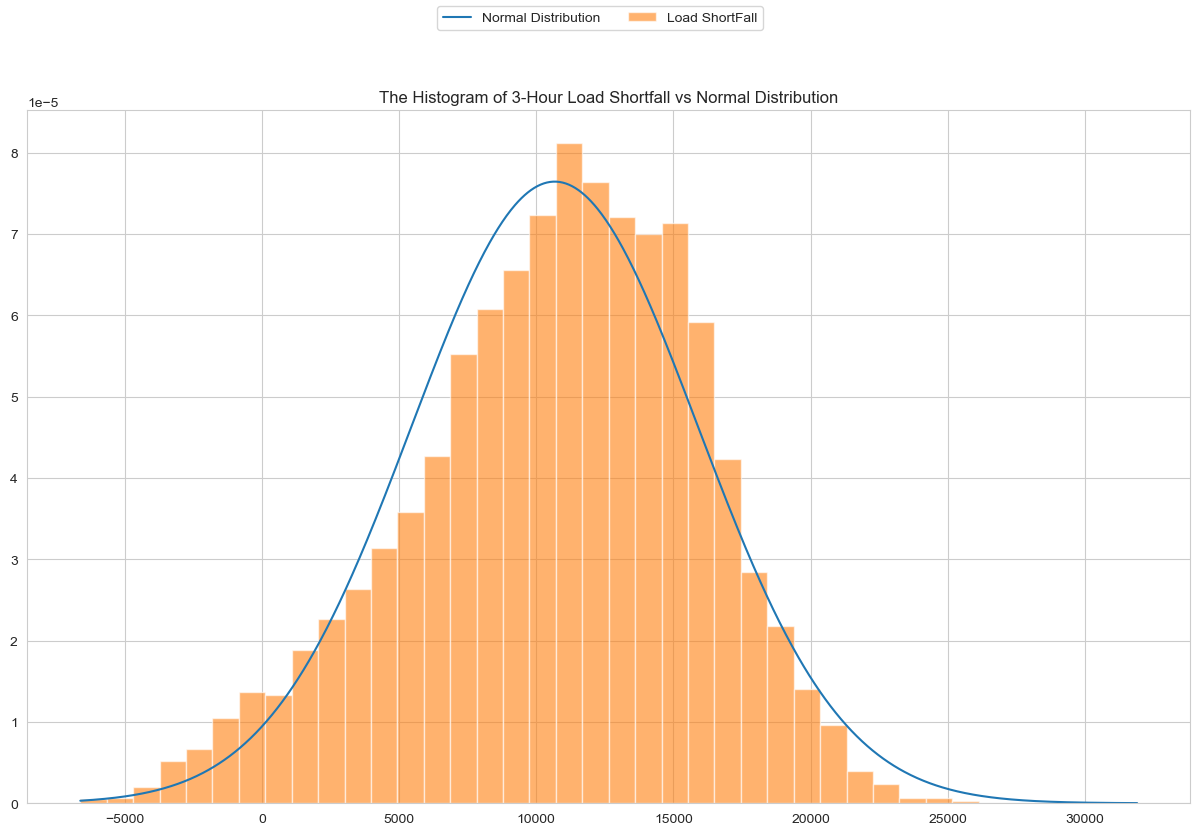

In [10]:
# Create a new figure object
fig, ax = plt.subplots(figsize=(15,9))

# Calculate important metrics from dataframe
mean_val =  df_train['load_shortfall_3h'].mean()
std_dev = df_train['load_shortfall_3h'].std()
min_val, max_val = df_train['load_shortfall_3h'].min(), df_train['load_shortfall_3h'].max()

# Plot the theoretical normal distribution of target variable
x = np.linspace(min_val, max_val, 1000)
ax.plot(x, norm.pdf(x, mean_val, std_dev), label = "Normal Distribution")

# Plot the normalized histogram of target variable
ax.hist(df_train['load_shortfall_3h'].values,
        alpha=0.6,
        label='Load ShortFall',
        bins=40,
        density=True
       )

# Set title of figure
ax.set_title("The Histogram of 3-Hour Load Shortfall vs Normal Distribution")

# Create lines and labels for use in legend
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# Insert figure legend and show the final figure
fig.legend(lines, labels, loc='upper center', ncol=2)
plt.show()

We see that our target variable is slightly skewed to the right from an ideal normal distribution. This can also be shown when we investigate the skew and kurtosis of our data explicitly, as done below

In [11]:
# Print the skew and kurtosis of our target variable
print(f"The Skew is {stats.skew(df_train['load_shortfall_3h'].values)}")
print(f"The Kurtosis is {stats.kurtosis(df_train['load_shortfall_3h'].values)}")

The Skew is -0.3847811918590848
The Kurtosis is -0.1196155018215368


Since we have a negative skewness, we can determine that our tail is slightly more pronounced on the left, rather than on the right. This indicates that more values are found on the right side of the mean as opposed to the left, indicating a skew to the right. Since the skew value is relatively small, it indicates that our target variable is fairly symmetrically distributed. Similarly, our kurtosis on this variable is very low, indicating a lack of outliers for our `load_shortfall_3h` variable

Next, let's look at some descriptive statistics for the rest of our variables:

In [12]:
# Get descriptive statistics of all potential predictor variables
statistics_df = df_train.drop('load_shortfall_3h', axis=1).describe().T
statistics_df

,count,mean,std,min,25%,50%,75%,max
madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02
barcelona_wind_speed,8763.0,2.870497,1.792197,0.000000,1.666667,2.666667,4.000000,1.266667e+01


While the table above might provide some interesting facts about our data, it is cumbersome to view and interpret in its current format. For now, let us identify which of our variables is heavily skewed, moderately skewed or relatively symmetrical:

In [13]:
# Create dataframe containing skewness of all potential predictor variables:
skew_df = df_train.drop('load_shortfall_3h', axis=1).skew().to_frame()

# Display variables with high skewness
Highly_Pos_Skew = skew_df[(skew_df[0] >= 1)]
Highly_Neg_Skew = skew_df[(skew_df[0] <= -1)]
print("High positive skew:", Highly_Pos_Skew, "\n \n")
print("High negative skew:", Highly_Neg_Skew, "\n \n")

# Display variables with moderate skewness:
Mod_Pos_Skew = skew_df[(skew_df[0] > 0.5) & (skew_df[0] < 1) ]
Mod_Neg_Skew = skew_df[(skew_df[0] < -0.5) & (skew_df[0] > -1)]
print("Moderate positive skew:", Mod_Pos_Skew, "\n \n")
print("Moderate negative skew:", Mod_Neg_Skew, "\n \n")

# Display relatively symmetrical values:
Sym_skew = skew_df[(skew_df[0] <= 0.5) & (skew_df[0] >= -0.5) ]
print("Relatively Symmetrical:", Sym_skew, "\n \n")

High positive skew:                               0
madrid_wind_speed      1.441144
bilbao_rain_1h         5.222802
valencia_wind_speed    3.499637
bilbao_wind_speed      1.716914
seville_clouds_all     1.814452
barcelona_wind_speed   1.057331
madrid_clouds_all      1.246745
seville_wind_speed     1.151006
barcelona_rain_1h      8.726988
seville_rain_1h        8.067341
bilbao_snow_3h        26.177568
barcelona_pressure    57.979664
seville_rain_3h       19.342574
madrid_rain_1h         7.074308
barcelona_rain_3h     12.696605
valencia_snow_3h      63.298084 
 

High negative skew:                              0
madrid_weather_id    -3.107722
barcelona_weather_id -2.584011
seville_weather_id   -3.275574
valencia_pressure    -1.705162
madrid_pressure      -1.850768
bilbao_weather_id    -1.234844 
 

Moderate positive skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate negative skew:                         0
bilbao_pressure -0.999642 
 

Relatively Symmetrical:                     

We can see that a large portion of our data is relatively symmetrical, however there is a lot of variables that shows a high amount of skew. Interestingly, our dataset contains almost no variables exhibiting only moderate skewness. We note that all `_weather_id` variables have a high negative skew. Furthermore, it seems that all of the rain and snow data collected shows a high positive skew. 

Let's repeat the same process for calculating the Kurtosis:

In [14]:
# Create dataframe containing Kurtosis of all potential predictor variables:
kurt_df = df_train.drop('load_shortfall_3h', axis=1).kurtosis().to_frame()

# Display variables with high Kurtosis:
high_kurt= kurt_df[(kurt_df[0] >= 3)]
print("High kurtosis (Large amount of outliers):", high_kurt, "\n \n")

# Display variables with low Kurtosis:
low_kurt= kurt_df[(kurt_df[0] < 3)]
print("Low kurtosis (Small amount of outliers):", low_kurt, "\n \n")


High kurtosis (Large amount of outliers):                                 0
bilbao_rain_1h          32.904656
valencia_wind_speed     35.645426
bilbao_wind_speed        3.631565
barcelona_rain_1h      101.578931
seville_rain_1h         93.840746
bilbao_snow_3h         806.128471
barcelona_pressure    3687.564230
seville_rain_3h        413.136592
madrid_rain_1h          76.584491
barcelona_rain_3h      187.800460
valencia_snow_3h      4089.323165
madrid_weather_id        9.259047
barcelona_weather_id     5.701882
seville_weather_id      10.710308 
 

Low kurtosis (Small amount of outliers):                              0
madrid_wind_speed     2.036462
seville_humidity     -1.017983
madrid_humidity      -1.167537
bilbao_clouds_all    -1.533417
seville_clouds_all    2.155921
bilbao_wind_deg      -1.083530
barcelona_wind_speed  1.493635
barcelona_wind_deg   -0.959160
madrid_clouds_all     0.142079
seville_wind_speed    1.398580
bilbao_pressure       1.825323
valencia_pressure     2.211823


Most of our data contains a relatively low amount of outliers. Interistingly, all of the rain and snow data, as well as most of the `_weather_id` variables contains a high amount of outliers. 

We can go one step further, and visualize all our numeric predictor variables. Obtaining histograms for each individual variable might provide key insights into the underlying structure of our data, and will corroborate the metrics calculated above:

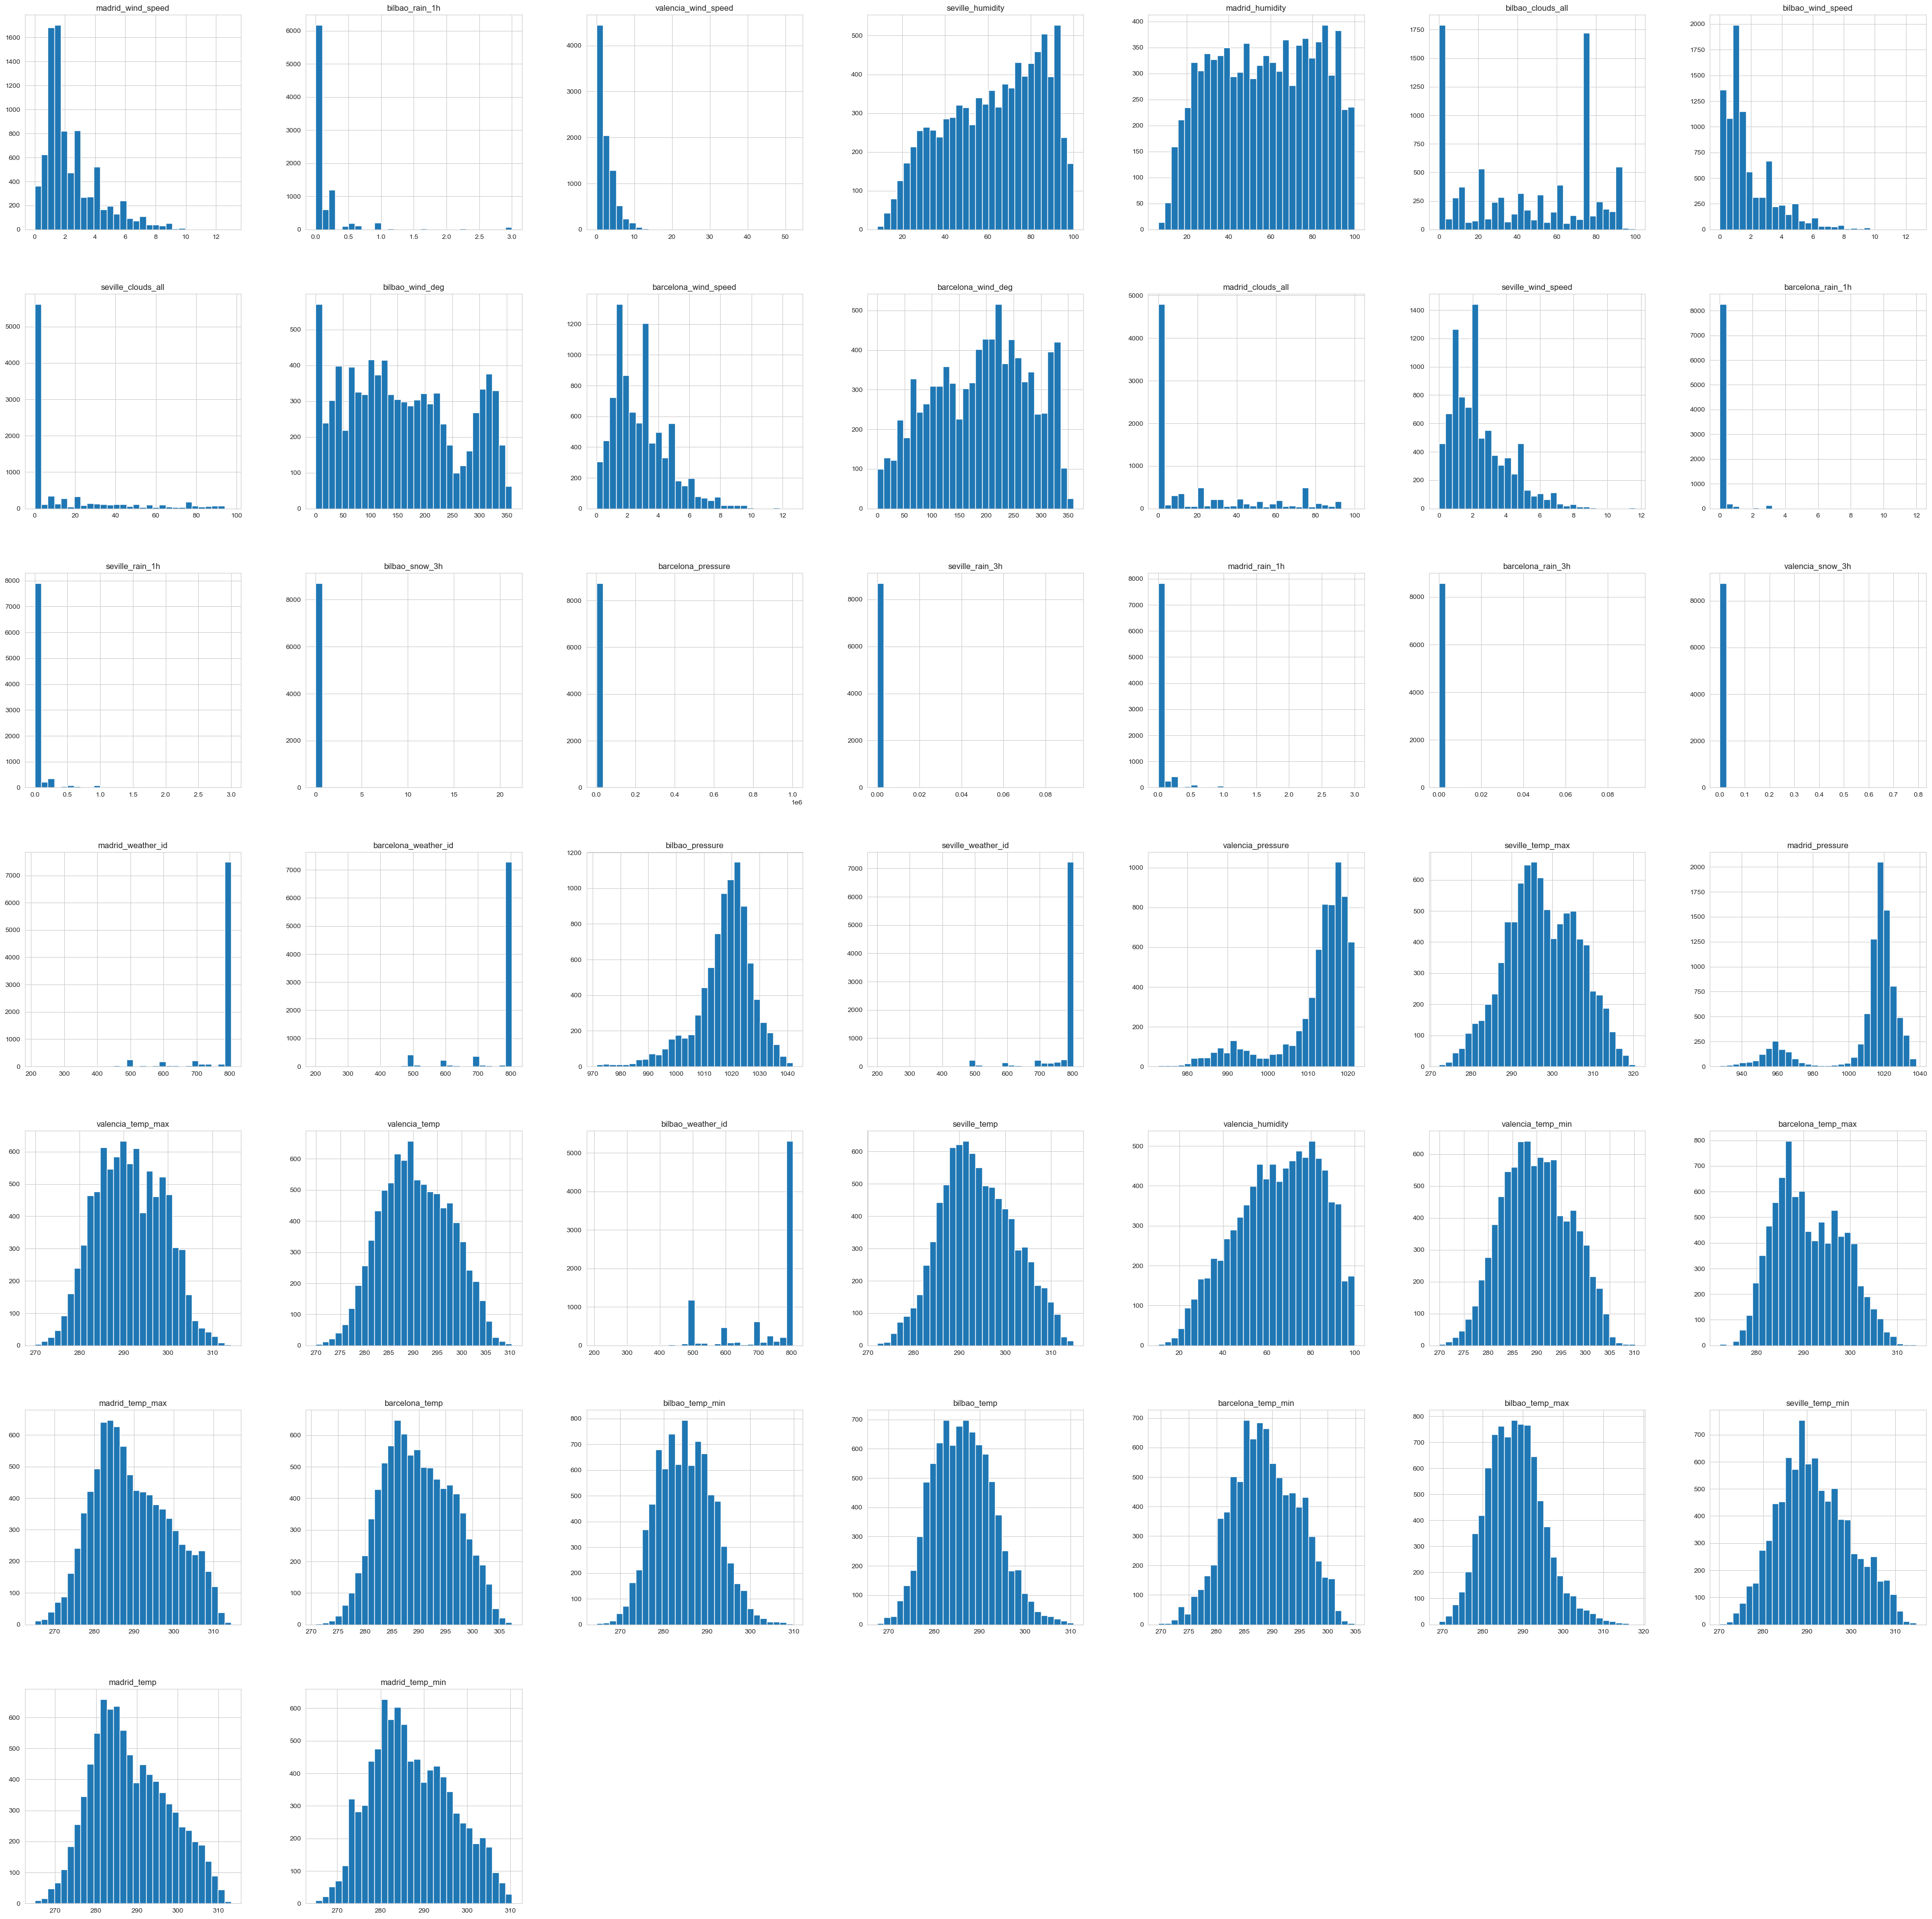

In [15]:
# Remove target variable form features to plot
features = num_vars[:-1] 

# Plots histograms for all features
df_train[features].hist(figsize=(50,50), bins=30)
plt.show()

The visualization above helps to easily identify variables that might prove troublesome when trying to build a coherent model of the data. For instance, it is clear that most of the cities experience close to no rain or snow throughout the data-collection period. Furthermore, the `_weather_id` variables for each city shows very little variation, making the impact that these might have on our target variable questionable, and we should consider if keeping them within the model would have any positive impact on our predictions, especially for models which doesn't automatically scale variables according to their influence. Lastly, we find a surprising result in the `barcelona pressure` variable, which shows almost no change in the data-collection period. This might be due to a large number of reasons, including erroneous collection of the data. Regardless, this feature shows almost no variation and should be noted down for further consideration

Selecting varaibles manually to include and exclude in the model building process can be quite challenging. 
One way of choosing which variables to manually include in the model, is to remove features whose values don't change much between observations, since they don't contribute much information to the model. We therefore select a variance threshold, and remove all features below this threshold. 

Since variance is dependent on scale, we will first need to normalize the features:

In [16]:
# Split predictor variables from target variable
X_data = df_train[num_vars[:-1]]
y_data = df_train[num_vars[-1]]

# Normalizing the data (using MinMaxScaler in sklearn.preprocessing package):
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

We can then implement an instance of the VarianceThreshold class contained in sklearn.feature_selection to select the correct subset of our features based on our chosen threshold (0.03 in this case): 

In [17]:
# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

Having applied this threshold to the data, we can view the calculated variance for each predictor variable:

In [18]:
# Get column variances
column_variances = selector.variances_

# Create dictionary of column variances
vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]

# Transform dictionary into a dataframe for better visualization
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
5,bilbao_clouds_all,0.105945
8,bilbao_wind_deg,0.080656
11,madrid_clouds_all,0.078692
4,madrid_humidity,0.067493
7,seville_clouds_all,0.062181
10,barcelona_wind_deg,0.061218
3,seville_humidity,0.060892
32,valencia_humidity,0.046143
43,madrid_temp_min,0.041115
27,madrid_pressure,0.040475


The above table shows the variance for each predictor variable. We can then inspect all variables before applying our threshold to see if doing so might exclude important predictors form our model. If we choose to use the variance threshold method for variable selection, we can see that all the following variables would be discarded from our dataset based on showing little variability


In [19]:
# Find columns to remove:
df_vars_remove = df_vars[df_vars['Variance']<0.03]


# Make a list of column names to remove
columns_to_remove = list(df_vars_remove["Variable_Name"])

# Display variables to be removed, along with their variances
df_vars_remove.sort_values(by="Variance", ascending=False)

,Variable_Name,Variance
39,barcelona_temp_min,0.029827
33,valencia_temp_min,0.029252
28,valencia_temp_max,0.029065
38,bilbao_temp,0.024880
37,bilbao_temp_min,0.021878
22,barcelona_weather_id,0.021340
40,bilbao_temp_max,0.021109
12,seville_wind_speed,0.020559
0,madrid_wind_speed,0.020257
23,bilbao_pressure,0.020208



Now, we can select our new columns to include in the model:

In [20]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# Comparing predictor variable count before and after applying variance threshold:
print("Before threshold: ", len(df_vars.T.columns), " predictors")
print("After threshold: ", len(X_new.columns), " predictors")

Before threshold:  44  predictors
After threshold:  20  predictors


Applying this standard of variable selection helped us eliminate more than half of all numeric predictor variables from our model, simplifying the model building process significantly

#### 4.3.2. Categorical Variables

Up to now, we have been inspecting all the variables that is numeric in nature. Let us now cast our focus to the categorical variables still present within the dataset. Let us consider which variables contains categorical data, and how many unique values they might take on:

In [21]:
# Number of unique values contained within the column
cat_unique = (
    df_train
    .select_dtypes(include='object')
    .nunique()
)

# Display categorical values, along with their unique value count
for i,j in zip(cat_unique.index, cat_unique.values):
    print(f"{i} has {j} unique values.")

valencia_wind_deg has 10 unique values.
seville_pressure has 25 unique values.


We see that we only have 2 categorical variables remaining within the dataset. Of the two, `valencia_wind_deg` takes on a fewer amount of values. Let us investigate further into how the data is distributed:

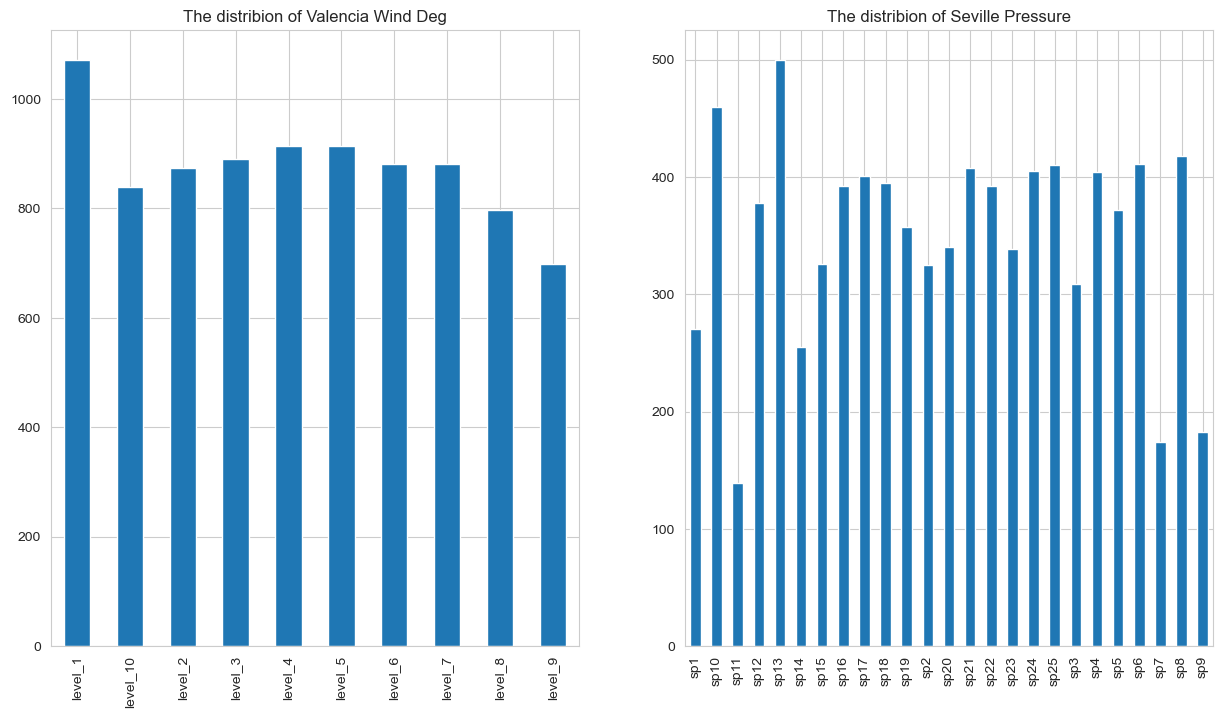

In [22]:
# Make a list of categorical variables
cat_cols = (
    df_train
    .select_dtypes(include='object')
    .columns
    .to_list()
)

# Initiate a figure object containing subplots equal to the amount of categorical variables
fig, axes = plt.subplots(1,len(cat_cols) ,figsize=(15,8))

# Initiate counter that keeps track of subplot position
i = 0

# Plot distributions for all categorical variables
for col in cat_cols:
    (
        df_train[col]
        .value_counts()
        .sort_index(ascending=True)
        .plot(kind='bar',
              ax=axes[i],
              title = f"The distribion of {re.sub(r'_',' ', col).title()}"
             )
    )
    i+=1
plt.show()

Form the visualization above, we gleam a few key insights. Both of our categorical variables contains inherently within them some corresponding numerical scale or value. This means that these categorical variables can be converted into numerical variables with relative ease. Furthermore, both features shows a high amount of variance, and will be beneficial to include in our model building process

### 4.4. Multivariate Analysis

Since we have considered each variable in a vacuum, we now turn our attention to how each variable correlates and influence the others. This multivariate analysis section is dedicated to that goal

#### 4.4.1. Numerical Multivariate Analysis

Let us first consider our numerical variables

Correlation coefficient is a measure of the how variables are related to one another. It is a standardized covariance, which measures how two random variables change with respect to each other. Since Covariance is scale dependent, we use the correlation coefficient (specifically Pearson Correlation) which standardizes the covariance to a scale between -1 and 1.

* A correlation coefficient closer 1 represents a strong linear relationship in the same direction, 
* A correlation coefficient closer to -1 represents a strong linear relationship in the opposite direction,
* A correlation closer to 0 represents a weak relationship.

The formula is given by:
$$\rho=\frac{Cov(X,Y)}{\sigma(X)\sigma(Y)}$$
Where
* $Cov(X,Y)$ represents the covariance between X and Y
* $\sigma(X)$ & $\sigma(Y)$ represent the standard deviations of X & Y respectively

In [23]:
# Investigate feature correlations 

df_train.corr(numeric_only = True)

,madrid_wind_speed,bilbao_rain_1h,valencia_wind_speed,seville_humidity,madrid_humidity,bilbao_clouds_all,bilbao_wind_speed,seville_clouds_all,bilbao_wind_deg,barcelona_wind_speed,barcelona_wind_deg,madrid_clouds_all,seville_wind_speed,barcelona_rain_1h,seville_rain_1h,bilbao_snow_3h,barcelona_pressure,seville_rain_3h,madrid_rain_1h,barcelona_rain_3h,valencia_snow_3h,madrid_weather_id,barcelona_weather_id,bilbao_pressure,seville_weather_id,valencia_pressure,seville_temp_max,madrid_pressure,valencia_temp_max,valencia_temp,bilbao_weather_id,seville_temp,valencia_humidity,valencia_temp_min,barcelona_temp_max,madrid_temp_max,barcelona_temp,bilbao_temp_min,bilbao_temp,barcelona_temp_min,bilbao_temp_max,seville_temp_min,madrid_temp,madrid_temp_min,load_shortfall_3h
madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157088,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,-0.018225,0.239326,0.213420,-0.026640,0.073080,-0.001642,0.009572,-0.026037,0.088502,-0.038246,-0.008114,-0.101497,-0.003074,-0.122915,-0.086691,0.054035,0.103342,0.075541,0.091352,0.093919,-0.031661,0.080357,-0.279825,0.093177,0.011151,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,-0.0

The table above shows the correlation coefficient of each variable in the dataset with respect to the others. 
Since we are looking at the correlation between 46 variables (which includes our dependent variable), it would be more beneficial to draw a heatmap of correlation to easily identify strong correlations between variables 

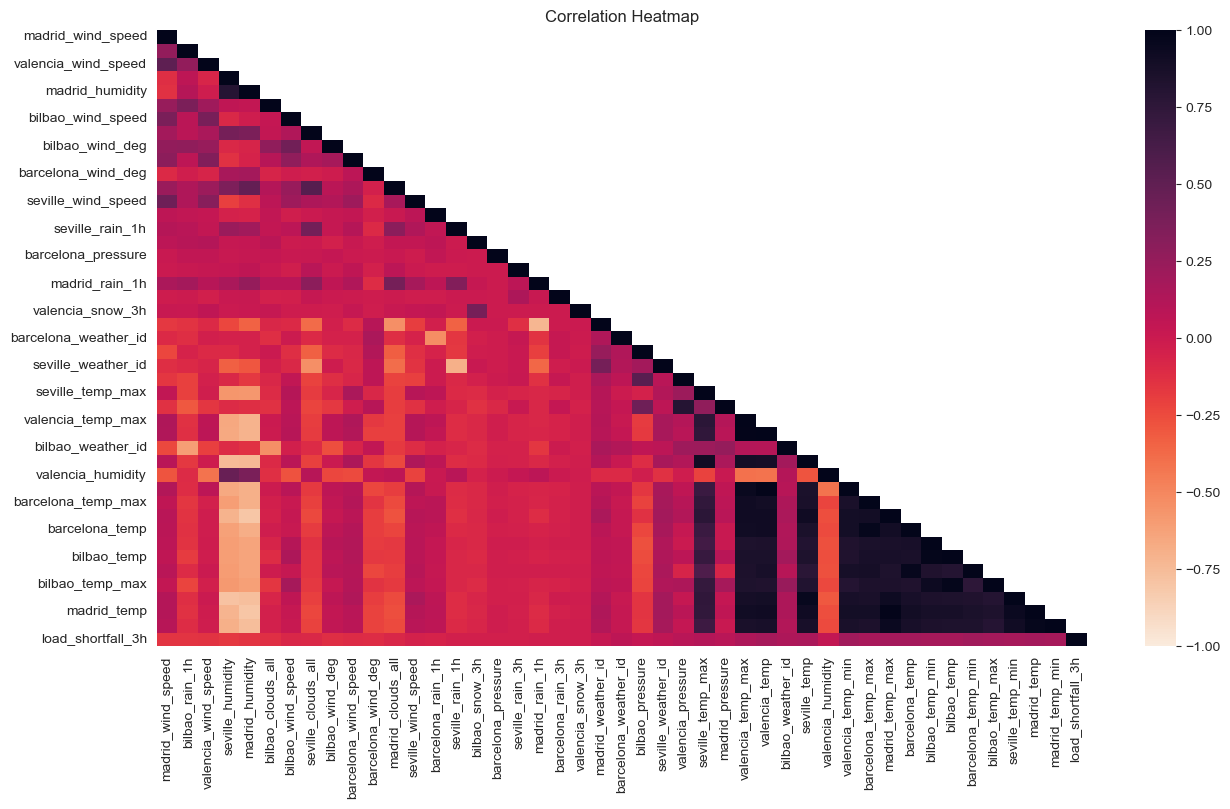

In [24]:
# Initiate a new figure object to plot our heatmap
plt.figure(figsize=(15,8))

# We look at only the lower triangle of the array, since it is symmetric around the diagonal
mask = np.tril(df_train.corr(numeric_only = True))==0



# Plotting the heatmap
sns.heatmap(df_train.corr(numeric_only = True),
            vmin=-1,
            vmax=1,
            mask=mask,
            cmap='rocket_r'
           )

plt.title('Correlation Heatmap');


From looking at the correlation heatmap, we see that there are a large amount of strong correlations, both positive and negative, between variables in the dataset. For example: `seville_humidity` and `seville_temp` are very strongly neagtivley correlated, while `valencia_temp` and `madrid_temp` are very strongly positively correlated. This means that our dataset contains a lot of superfluous and redundant information, which will negatively impact the predictive power of the model. We will either have to select variables to include in the model manually, or make use of a regression model that automatically scales the coefficients, like a **Ridge** or **LASSO** regression model.


If we choose to include and exclude predictor variables manually, we would need to establish some criteria to apply our filtering of the data. A common way of doing this is to examine the correlation between our predictor variables and our dependent variable `load_shortfall_3h`. Another common way is fitting a model using the correlated features and picking the one that contributes the most to the model.

Let's investigate the top 10 variables that are correlated with the target variable, ignoring the direction direction

In [25]:
# Find the ten most correlated variables with the target variable
corr_top10_df = (
    df_train.corr(numeric_only = True)['load_shortfall_3h']
    .apply(lambda x : abs(x))
    .sort_values(ascending=False)
    .head(5)
)

# Display predictor variables
corr_top10_df[1:11]

valencia_temp_min     0.201863
barcelona_temp_min    0.195984
madrid_temp           0.186036
barcelona_temp        0.182673
Name: load_shortfall_3h, dtype: float64

From the above, we see that even our strongest correlated predictor variable is not very strongly correlated with our target variable. Let us investigate further by means of visualizing our variable correlations with all other variables

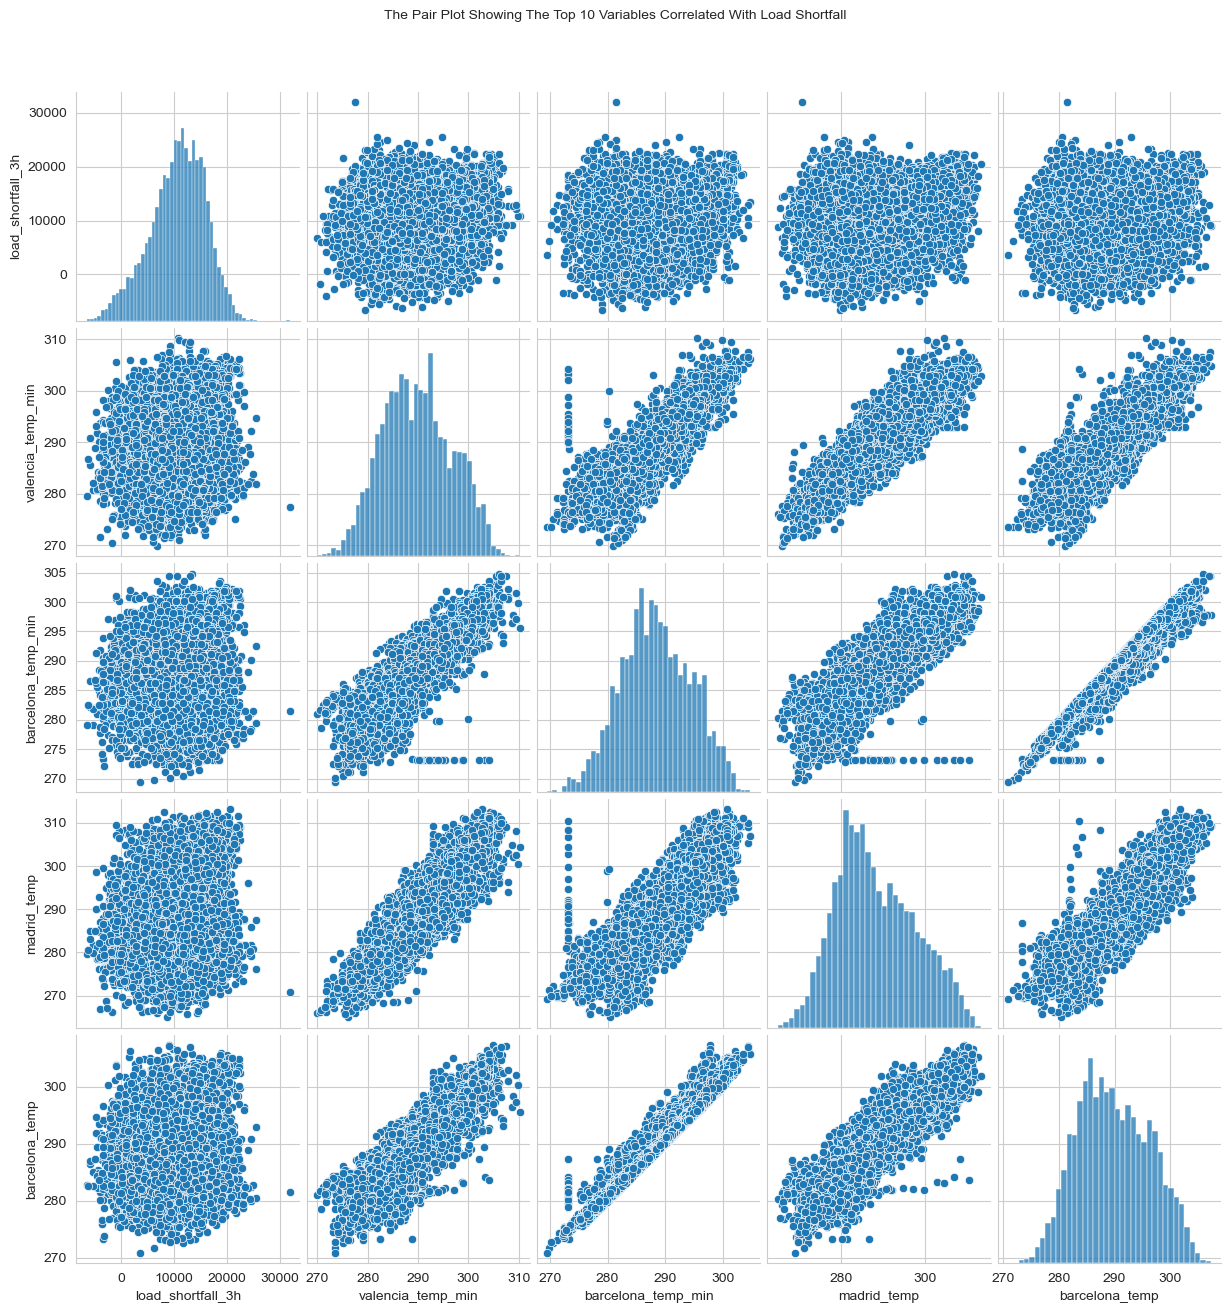

In [26]:
top10 = sns.pairplot(df_train[corr_top10_df.index]
                    )
top10.fig.suptitle('The Pair Plot Showing The Top 10 Variables Correlated With Load Shortfall', 
                   y=1.05,
                   size=10)
plt.show()

Again, we see from the above that none of the predictors are very highly correlated with the `load_shortfall_3h`. However, the predictors appear to be highly correlated with one another, examples being `valencia_temp_min` and `valencia_temp`. This indicates the presence of multicollinearity within the data, which will result in less reliable statistical inferences when it comes to building functional models since the effects of one variable on the target becomes difficult to distinguish from the effects of another

#### 4.4.2. Categorical Multivariate Analysis

Next let us consider our categorical data. First, let us break down the distribution of our target variable based on each individual value of our two categorical predictor variables:

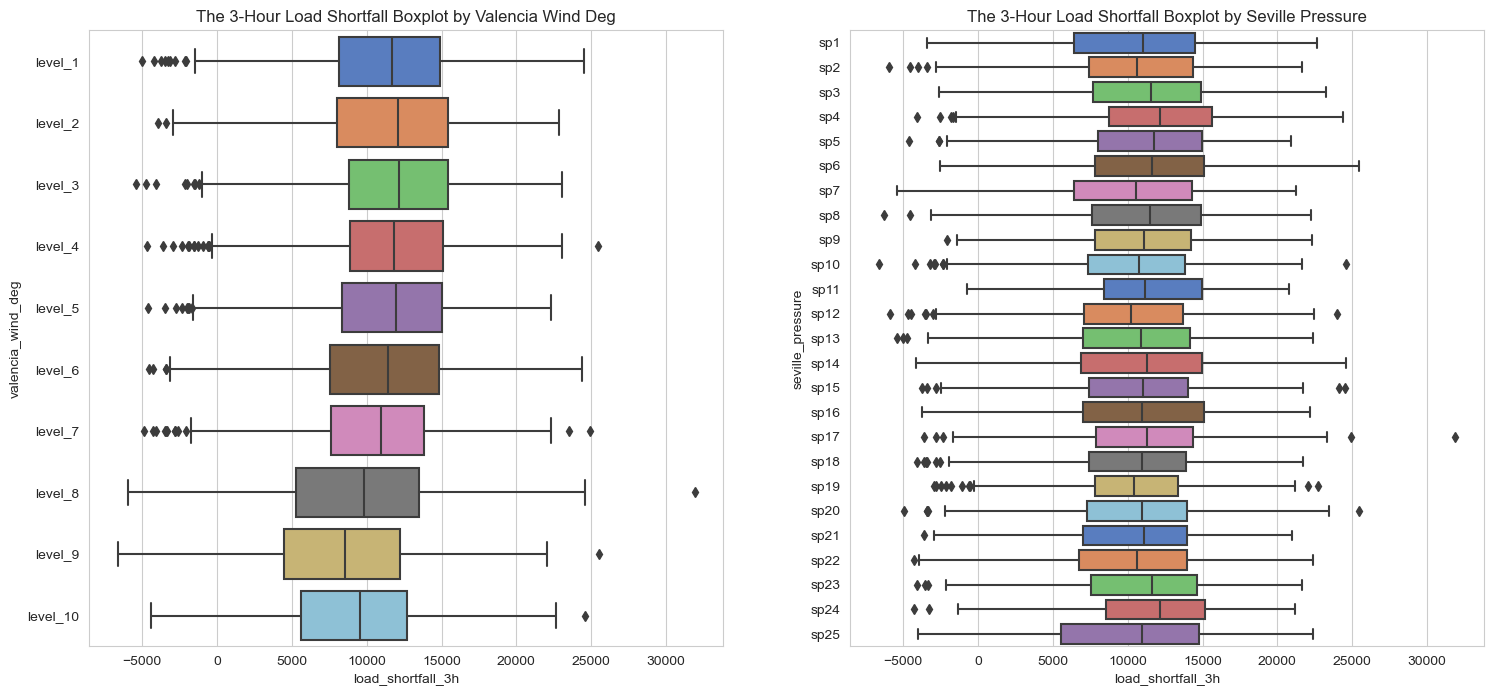

In [27]:
# Initialise a figure object
fig,axes = plt.subplots(1,
                        2,
                        figsize=(18,8)
                       )

# Create counter to keep track of subplot position
counter=0

# Plot a box plot of the target variable based on all instances of predictor variable values
for col in cat_cols:
    df_train[f"{col}_sort"] =  df_train[col].apply(lambda  x : int(re.search(r"\d+", x ).group())) # Sort columns in sequential order
    sns.boxplot(
        data=df_train.sort_values(by = f"{col}_sort"),
        x='load_shortfall_3h',
        y=col,
        palette='muted',
        ax = axes[counter]
    ).set_title(f"The 3-Hour Load Shortfall Boxplot by {re.sub('_', ' ',col).title()}")
    counter+=1
    df_train.drop(columns=[f"{col}_sort"],
            inplace=True
           )

plt.show()

We see that both categorical variables seems to have some influence on our target variable. Let us calculate a chi-squared test for these variables to determine their independence

In [28]:
# Chi-squared independent test for categorical variables

# Creating a contingency table
ct = pd.crosstab(df_train['valencia_wind_deg'], 
                 df_train['seville_pressure'],
                 margins=True
                )

# Discount the last row and column of the table, since they house combined results
obs = ct.iloc[:-1,:-1]

# Perform a chi square test of independence
res = chi2_contingency(obs)

# Print results
print(f"The test_statistics is {res[0]} and the p_value is {res[1]} at {res[2]} degrees of freedom")

The test_statistics is 1259.86678922933 and the p_value is 8.708288784985601e-147 at 216 degrees of freedom


Since the p-value is extremely small, it provides concrete evidence against the fact that the 2 variables are independent. 

#### 4.4.3. Time Effects on the 3-Hour Load Shortfall

Lastly, let us consider the effect of our datetime data on our target variable. First, let's plot the target variable as a function of the date and time, to see if there is any relationship between them:

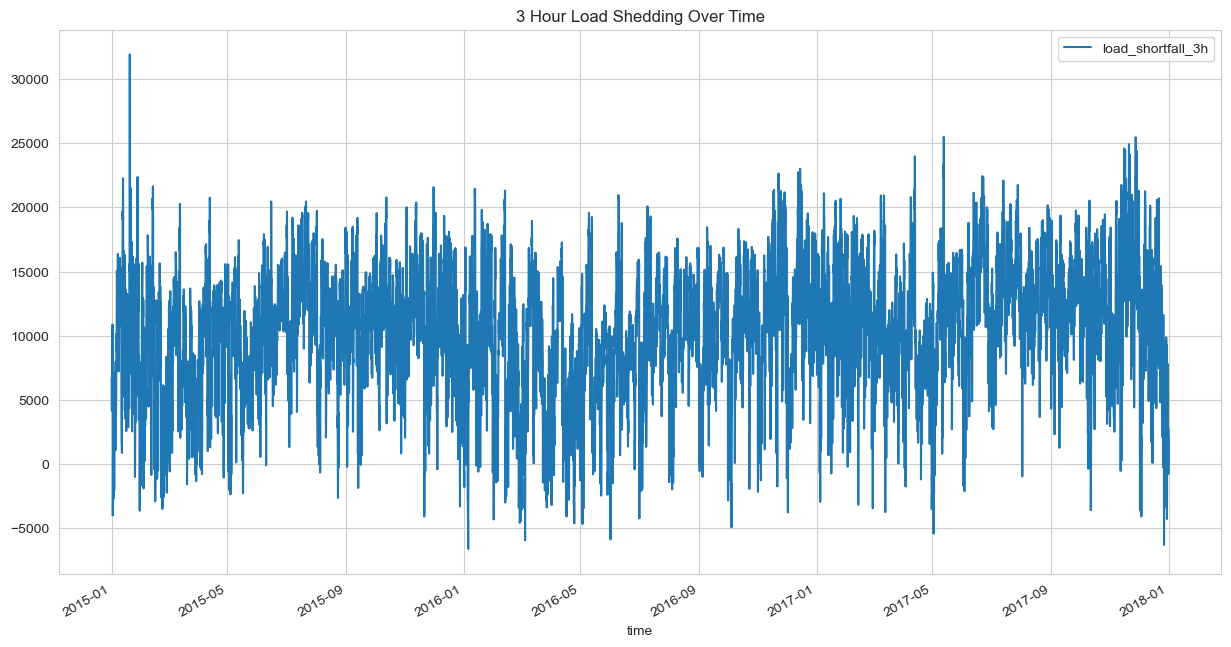

In [29]:
# Initialize a new figure object
fig1, ax1 = plt.subplots(figsize=(15,9))

# Plot the target variable as a function of time
(
    df_train[['time','load_shortfall_3h']]
    .set_index('time')
    .plot(figsize=(15,8),
          ax=ax1
         )
)

# Set the title of the graph, and display it to the screen
ax1.set_title('3 Hour Load Shedding Over Time')
plt.show()

The observations we can make from the figure above is extremely interesting. We can clearly see a clear cyclical relationship between the load shortfall, and the time of the year. This might point to the fact that the season may have a large influence on our target variable. We can investigate further, breaking down the datetime into relevant categories and exploring more potential influences on the target variable. Let us first consider the load shortfall per year:

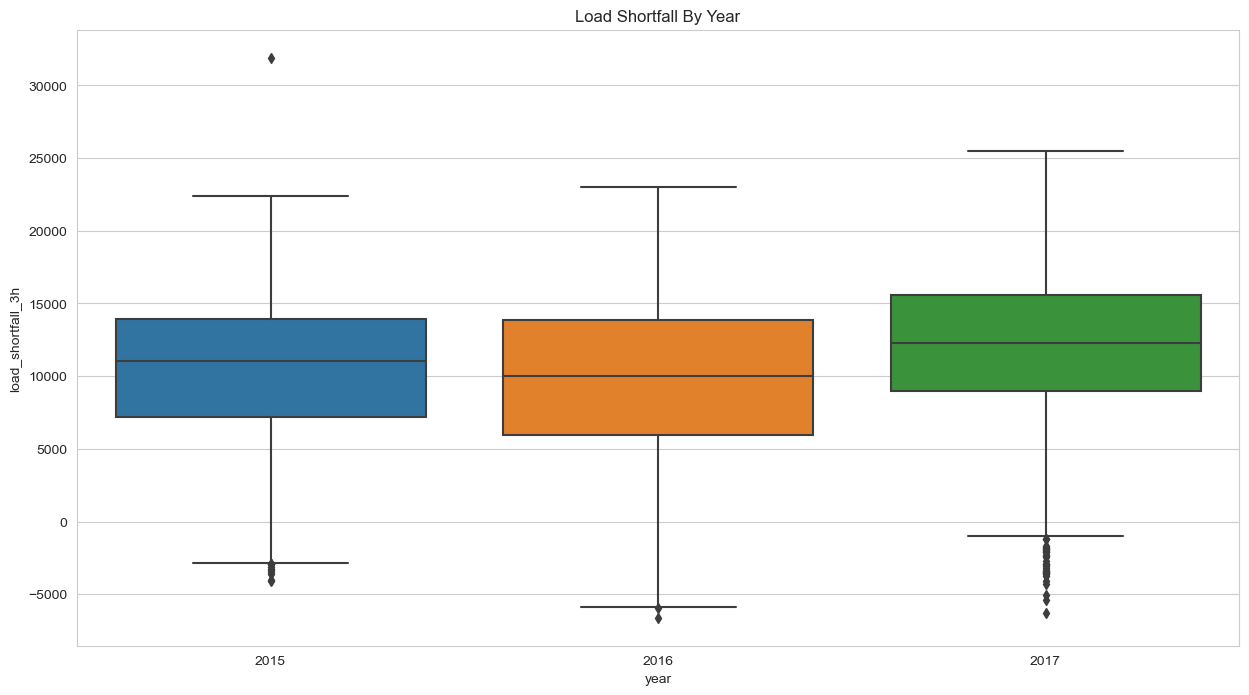

In [30]:
# Create a new column in the database containing the year which data was collected:
df_train['year'] = df_train['time'].dt.year

# Initiate a new figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot the distribution of load shortfall per year
sns.boxplot(data=df_train, x="year", y="load_shortfall_3h")

# Set figure title and display image
ax.set_title('Load Shortfall By Year')
plt.show()

We see that the average load shortfall decreased for the year 2016, and then dramatically improved for the year 2017 again. The reasons for this is still unclear, but form the data we can see that the year 2017 had a larger difference between the amount of energy generated from renewable sources, as opposed to non-renewable. Either the amount of renewable energy produced increased, or the production of non-renewable energy decreased.

Let us plot the load shortfall as a function of month of the year, to investigate further into the effects of season on the target variable:

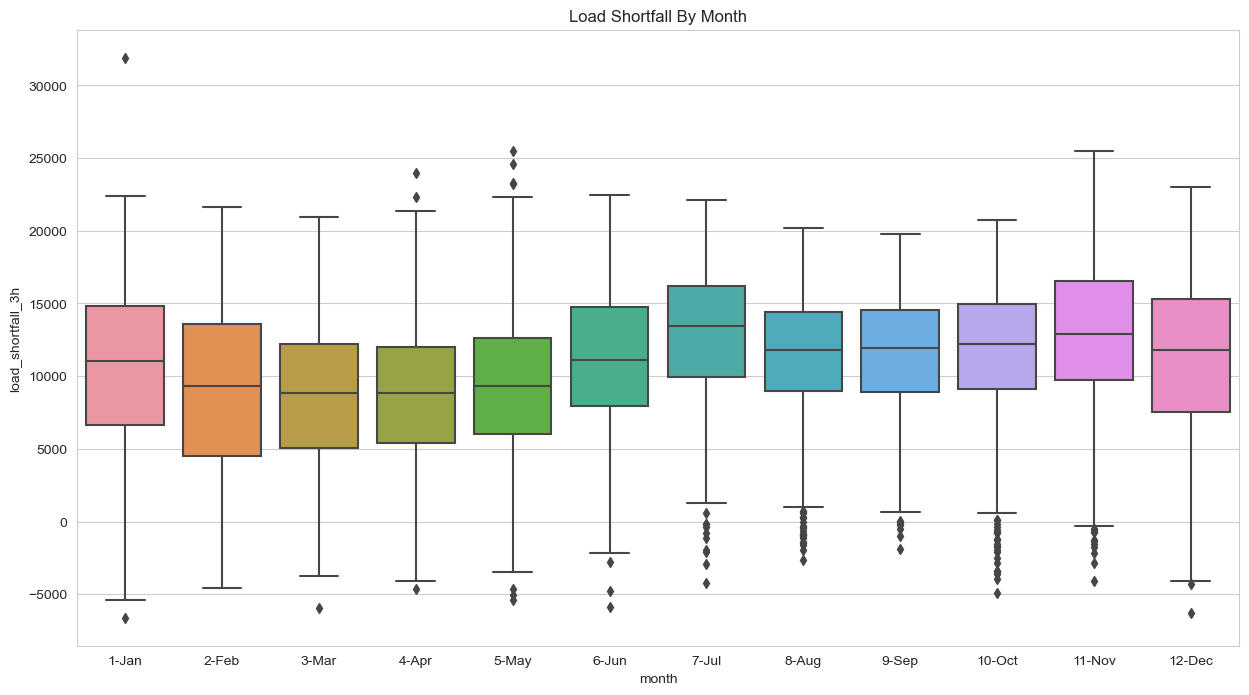

In [31]:
# Extract month of the year into new variable
df_train['month'] = df_train['time'].dt.month.apply(lambda x : f'{x}-{calendar.month_abbr[x]}')

# Initialize a figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot the target variable as a function of month of the year
sns.boxplot(data=df_train, x="month", y="load_shortfall_3h")

# Set title and display image
ax.set_title('Load Shortfall By Month')
plt.show()

Here we can more clearly see the effect that the month of the year  can have on the target variable. The target variable is lowest in the spring(March 1st to May 31st), indicating that springtime is less reliable for the production of renewable energy in the region. The load shortfall then increases as summer (June 1 to August 31st) approaches, reaching a peak right as summer does. Autumn (September 1 to November 30) sees a stable production of renewable energy, and the production then decreases again as winter (December 1st to February 28/29) falls. The reason for this is not evident by just observing the graph above. We could speculate that the sun is less efficient during winter as a source of solar energy, decreasing the efficiency of solar power which increases again in summer times as the sun becomes more effective. Rain and snowfall may also play a part on the production of renewable energy, and will vary as the seasons does.

Let us consider which hours of the day produces more renewable energy:

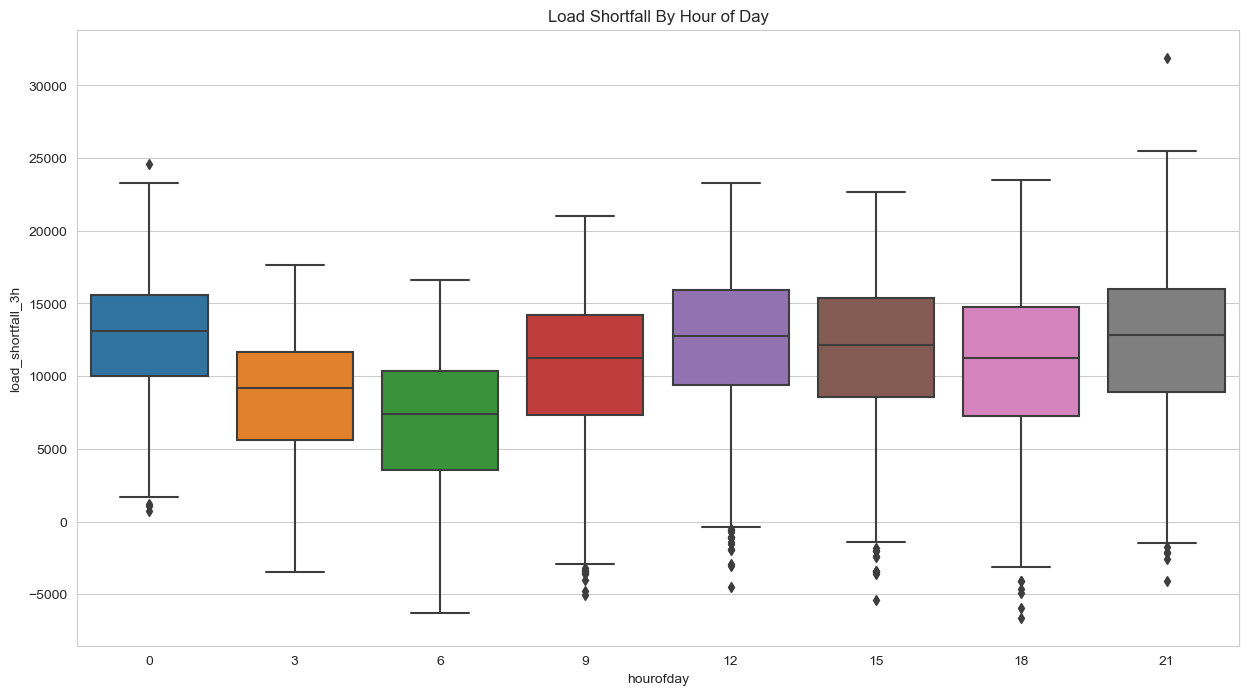

In [32]:
# Create a new variable containing the hour of the day
df_train['hourofday'] = df_train['time'].dt.hour 

# Initialize a new figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot target variable as a function of the hour of the day
sns.boxplot(data=df_train,
            x="hourofday",
            y="load_shortfall_3h"
           )

# Set title and display image
ax.set_title('Load Shortfall By Hour of Day')
plt.show()

We see that between midnight and 6 am, the renewable energy production gradually decreases. Afterwards, it picks up rapidly and stabilizes throughout the rest of the day. 

Finally, lets consider the impact that the day of the week has on the production of renewable energy:

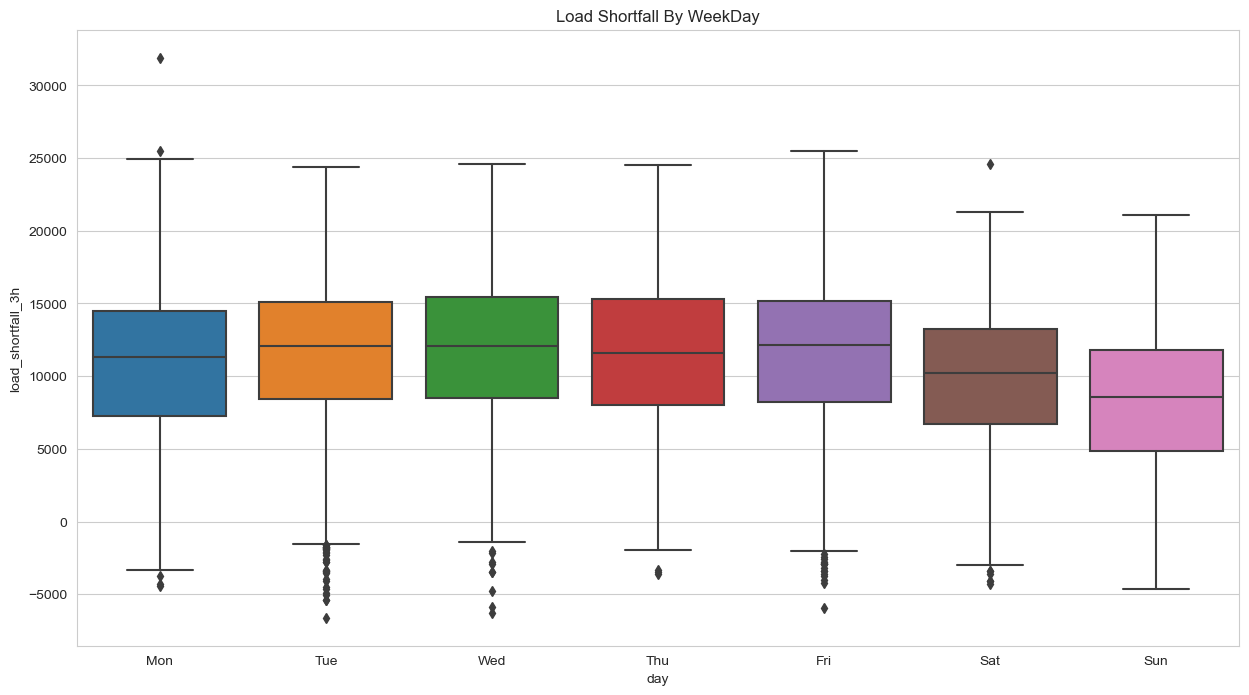

In [33]:
# Create a new variable containing the numeric day of the week
df_train['day'] = df_train['time'].dt.dayofweek

# Initialize a new figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot target variable as a function of weekday
sns.boxplot(data=df_train,
            x="day",
            y="load_shortfall_3h"
           )

# Set title, set x axis to corresponding day of the week and display image
ax.set_title('Load Shortfall By WeekDay')
ax.set_xticks([0,1,2,3,4,5,6], labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

Finally, we see that the amount of renewable energy produced is stable throughout the week, but falls quite significantly on Saturdays and Sundays

<a id="five"></a>
## 5. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we will clean the dataset and create new features as identified in the EDA phase. |

---

For engineering the data, we will consider the original data as given, and discard the temporary changes made during the EDA section. This is due to the fact that the changes made to the datasets were specifically tailored to improve the EDA, where the changes we will make now will be specifically tailored to improve the model performance. 


In [34]:
# Read the original data into our dataframes
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv("df_test.csv")

### 5.1 General data engineering applicable to all models:

Since we will be altering the structure of our dataset, we will combine our testing and training datasets in order to avoid duplicating the operations performed on them: 

In [35]:
# Stack the training dataset on top of the testing dataset
df_combined = pd.concat((df_train, df_test))


Let's remind ourselves how the dataframe looks when we roll back the changes made during the EDA process

In [36]:
# DIsplay first 5 rows of combined dataframe 
df_combined.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


Note that from the way our datasets are stacked, the testing dataset is at the bottom of our new combined dataset. Since the testing dataset doesn't have values for our response variable `load_shortfall_3h`, we expect those values to be empty for the 2nd part of our dataset. We can demonstrate this by displaying the last few entries of our combined dataset:

In [37]:
# Display last values of combined dataframe
df_combined.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,70.000000,6.333333,320.000000,0.0,2.000000,0.0,sp24,0.0,0.0,1029.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.666667,800.0,NaN,280.816667,1031.666667,279.816667,279.323333,734.333333,280.210000,69.666667,278.816667,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,36.666667,2.666667,293.333333,0.0,4.000000,0.0,sp24,0.0,0.0,1028.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.333333,800.0,NaN,287.483333,1031.333333,290.816667,290.323333,747.666667,287.280000,32.000000,289.816667,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0,14.666667,2.666667,233.333333,0.0,4.666667,0.0,sp23,0.0,0.0,1027.000000,0.0,0.0,0.0,0.0,800.0,800.0,1033.000000,800.0,NaN,290.816667,1030.000000,293.483333,293.483333,800.000000,290.816667,23.666667,293.483333,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.0,19.000000,2.333333,253.333333,0.0,3.333333,0.0,sp23,0.0,0.0,1027.000000,0.0,0.0,0.0,0.0,800.0,800.0,1033.333333,800.0,NaN,288.816667,1030.333333,286.483333,285.976667,800.000000,288.300000,59.000000,285.483333,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,0.0,120.000000,4.666667,310.000000,0.0,3.666667,0.0,sp23,0.0,0.0,1028.000000,0.0,0.0,0.0,0.0,800.0,800.0,1034.000000,800.0,NaN,284.816667,1030.666667,281.150000,280.313333,800.000000,284.423333,79.000000,279.483333,283.816667,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN



Let us consider all the information gathered during our exploratory data analysis. One of the first things we noted was that the dataset contained a redundant variable `Unnamed 0`. Since this variable does not contribute anything meaningful to the dataset and will not be used by any of the models we plan to train, we can remove it:

In [38]:
# Drop "Unnamed: 0" column from database
df_combined = df_combined.drop("Unnamed: 0", axis = "columns")
df_combined

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.000000,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.000000,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.000000,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.000000,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.000000,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,70.000000,6.333333,320.000000,0.0,2.000000,0.0,sp24,0.0,0.0,1029.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.666667,800.0,NaN,280.816667,1031.666667,279.816667,279.323333,734.333333,280.210000,69.666667,278.816667,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
2916,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,36.666667,2.666667,293.333333,0.0,4.000000,0.0,sp24,0.0,0.0,1028.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.333333,800.0,NaN,287.483333,1031.333333,290.816667,290.323333,747.666667,287.280000,32.000000,289.816667,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280

Next we need to consider variables that have missing values. As found when doing the EDA, `Valencia_pressure` is the only variable that has incomplete entries. Since it is numeric, we can impute this value by selecting the either the mean, median, or mode of the column:

In [39]:
# Comparing different imputing values:

print("Mode ---> ", df_combined["Valencia_pressure"].mode()[0])

print("Median ---> ", df_combined["Valencia_pressure"].median())

print("Mean ---> ", df_combined["Valencia_pressure"].mean())

Mode --->  1018.0
Median --->  1015.0
Mean --->  1012.3466870428987


We see that there is not a big difference between these values. This indicates that any metric we select to impute on would be sufficient. For our models we will use the mode, since it represents the most recurring value in the data.
 

In [40]:
# Impute missing values with the mode
df_combined['Valencia_pressure'] = df_combined["Valencia_pressure"].fillna(df_combined["Valencia_pressure"].mode()[0])

# Verify that all values were imputed
print("Valencia pressure has ",df_combined['Valencia_pressure'].isnull().sum(), " missing values")

Valencia pressure has  0  missing values


The next order of business is to deal with our categorical variables. Since both `Valencia_wind_deg` and `Seville_pressure` contains numerical information within them, we will extract the relevant data from them and change them into numerical values:

In [41]:
# Print initial datatypes
print("Before engineering: ", "\nValencia_wind_deg ---> ", type(df_combined["Valencia_wind_deg"].values[0]), "\nSeville_pressure ---> ", type(df_combined["Valencia_wind_deg"].values[0]))


# Extracting numeric values from columns:
df_combined["Valencia_wind_deg"] = df_combined["Valencia_wind_deg"].str.extract('(\d+)')
df_combined["Seville_pressure"] = df_combined["Seville_pressure"].str.extract('(\d+)')

# Converting to numeric data
df_combined["Valencia_wind_deg"] = pd.to_numeric(df_combined["Valencia_wind_deg"])
df_combined["Seville_pressure"] = pd.to_numeric(df_combined["Seville_pressure"])

# Print final datatypes
print("After engineering: ", "\nValencia_wind_deg ---> ", type(df_combined["Valencia_wind_deg"].values[0]), "\nSeville_pressure ---> ", type(df_combined["Valencia_wind_deg"].values[0]))

df_combined

Before engineering:  
Valencia_wind_deg --->  <class 'str'> 
Seville_pressure --->  <class 'str'>
After engineering:  
Valencia_wind_deg --->  <class 'numpy.int64'> 
Seville_pressure --->  <class 'numpy.int64'>


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.000000,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.000000,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.000000,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.000000,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.000000,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2018-12-31 09:00:00,0.333333,9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,70.000000,6.333333,320.000000,0.0,2.000000,0.0,24,0.0,0.0,1029.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.666667,800.0,1018.000000,280.816667,1031.666667,279.816667,279.323333,734.333333,280.210000,69.666667,278.816667,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
2916,2018-12-31 12:00:00,0.333333,8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,36.666667,2.666667,293.333333,0.0,4.000000,0.0,24,0.0,0.0,1028.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.333333,800.0,1018.000000,287.483333,1031.333333,290.816667,290.323333,747.666667,287.280000,32.000000,289.816667,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
2917,2018-12-31 15:0

Lastly, we consider the `time` variable, which is currently stored in a string format. First, let us rectify this by converting it to the proper _datetime_ format:

In [42]:
# Converting datatype to datetime:
df_combined['time'] = pd.to_datetime(df_combined['time'])

# Verifying new datatype
print(type(df_combined.time.values[0]))

<class 'numpy.datetime64'>


Since most of our models won't be able to understand _Datetime_ datatypes, we will need to perform some dummy variable encoding to extract the important data from the `time` variable

In [43]:
#creating new columns for the year, month, day of the week, and hour of the day:
df_combined["year"] = df_combined['time'].dt.year
df_combined["month"] = df_combined['time'].dt.month
df_combined["day"] = df_combined['time'].dt.dayofweek
df_combined["hour_of_day"] = df_combined['time'].dt.hour

# Removing datetime datatype
df_combined = df_combined.drop(['time'], axis = 'columns')

df_combined


,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,day,hour_of_day
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.000000,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,3,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.000000,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,3,6
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.000000,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,3,9
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.000000,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,3,12
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.000000,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.333333,9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,70.000000,6.333333,320.000000,0.0,2.000000,0.0,24,0.0,0.0,1029.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.666667,800.0,1018.000000,280.816667,1031.666667,279.816667,279.323333,734.333333,280.210000,69.666667,278.816667,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN,2018,12,0,9
2916,0.333333,8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,36.666667,2.666667,293.333333,0.0,4.000000,0.0,24,0.0,0.0,1028.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.333333,800.0,1018.000000,287.483333,1031.333333,290.816667,290.323333,747.666667,287.280000,32.000000,289.816667,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN,2018,12,0,12
2917,1.000000,6,0.0,3.000000,47.000000,26.33

Since we added some new variables to our dataset, it is good practice to reindex our dataframe so that our target variable is on the rightmost side:

In [44]:

# reindexing df so that our target variable is on the rightmost side:
df_combined = df_combined.reindex(columns = [col for col in df_combined.columns if col != 'load_shortfall_3h'] + ['load_shortfall_3h'])


df_combined

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month,day,hour_of_day,load_shortfall_3h
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.000000,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,2015,1,3,3,6715.666667
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.000000,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,2015,1,3,6,4171.666667
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.000000,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,2015,1,3,9,4274.666667
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.000000,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,2015,1,3,12,5075.666667
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.000000,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,2015,1,3,15,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.333333,9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,70.000000,6.333333,320.000000,0.0,2.000000,0.0,24,0.0,0.0,1029.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.666667,800.0,1018.000000,280.816667,1031.666667,279.816667,279.323333,734.333333,280.210000,69.666667,278.816667,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,2018,12,0,9,NaN
2916,0.333333,8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,36.666667,2.666667,293.333333,0.0,4.000000,0.0,24,0.0,0.0,1028.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.333333,800.0,1018.000000,287.483333,1031.333333,290.816667,290.323333,747.666667,287.280000,32.000000,289.816667,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,2018,12,0,12,NaN
2917,1.000000,6,0.0,3.000000,47.000000,26.33

Furthermore, let us de-capitalize all our variables found in the dataset for the sake of consistency:

In [45]:
# Lowercase all column titles
df_combined.columns = df_combined.columns.str.lower()

df_combined

,madrid_wind_speed,valencia_wind_deg,bilbao_rain_1h,valencia_wind_speed,seville_humidity,madrid_humidity,bilbao_clouds_all,bilbao_wind_speed,seville_clouds_all,bilbao_wind_deg,barcelona_wind_speed,barcelona_wind_deg,madrid_clouds_all,seville_wind_speed,barcelona_rain_1h,seville_pressure,seville_rain_1h,bilbao_snow_3h,barcelona_pressure,seville_rain_3h,madrid_rain_1h,barcelona_rain_3h,valencia_snow_3h,madrid_weather_id,barcelona_weather_id,bilbao_pressure,seville_weather_id,valencia_pressure,seville_temp_max,madrid_pressure,valencia_temp_max,valencia_temp,bilbao_weather_id,seville_temp,valencia_humidity,valencia_temp_min,barcelona_temp_max,madrid_temp_max,barcelona_temp,bilbao_temp_min,bilbao_temp,barcelona_temp_min,bilbao_temp_max,seville_temp_min,madrid_temp,madrid_temp_min,year,month,day,hour_of_day,load_shortfall_3h
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.000000,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,2015,1,3,3,6715.666667
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.000000,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,2015,1,3,6,4171.666667
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.000000,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,2015,1,3,9,4274.666667
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.000000,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,2015,1,3,12,5075.666667
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.000000,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,2015,1,3,15,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.333333,9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,70.000000,6.333333,320.000000,0.0,2.000000,0.0,24,0.0,0.0,1029.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.666667,800.0,1018.000000,280.816667,1031.666667,279.816667,279.323333,734.333333,280.210000,69.666667,278.816667,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,2018,12,0,9,NaN
2916,0.333333,8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,36.666667,2.666667,293.333333,0.0,4.000000,0.0,24,0.0,0.0,1028.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.333333,800.0,1018.000000,287.483333,1031.333333,290.816667,290.323333,747.666667,287.280000,32.000000,289.816667,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,2018,12,0,12,NaN
2917,1.000000,6,0.0,3.000000,47.000000,26.33

Finally, let us split the dataset back into te respective training and testing parts:

In [46]:
'''split data back into train and test datasets: '''

# Extracting the response variables from the training dataset
y_train_dataset = df_combined[:len(df_train)][['load_shortfall_3h']]

# Separating predictor variables from response variable for the combined dataset
x_dataset = df_combined[:len(df_combined)].drop("load_shortfall_3h", axis = "columns")

# Extracting predictor variables for the respective training and testing datasets 
x_train_dataset = df_combined[:len(df_train)].drop('load_shortfall_3h', axis='columns')
x_test_dataset = df_combined[len(df_train):].drop('load_shortfall_3h', axis='columns')


In [47]:
# Use sklearn to split train dataset into training and validation sections:
x_ridge_train, x_ridge_validate, y_ridge_train, y_ridge_validate = train_test_split(x_train_dataset, y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)

### 5.1 Engineering for a Simple Linear Regression:

The first model we wish to consider, is that of a simple linear regression. We will use all of the variables currently in the dataset after performing our general data engineering, and perform no subsequent alteration to tailor our dataset to this model. 

In order to test our model, we will split the training dataset into 2 different sections. We will name these sections the training and validation sections respectively:

In [48]:
# Use sklearn to split train dataset into training and validation sections:
x_slr_train, x_slr_validate, y_slr_train, y_slr_validate = train_test_split(x_train_dataset, y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)


### 5.2 Engineering for an Improved Linear Regression:

In the case of the simple linear regression, we included all of the potential predictor variables to the model. To simplify the model and hopefully improve on the predictive capabilities, we will again implement a linear regression model, but only include predictor variables that was found to have significant variance according to our EDA. We also drop the features `_weather_id` and `_temp_min/max` form the data in an attempt to remove some multicolinearity, since the information they contain is duplicate by the rest of the features regarding the weather at each location

In [51]:
# Remove columns with low variance from model
ilr_x_train_dataset = x_train_dataset.drop(columns_to_remove, axis=1)
ilr_x_test_dataset = x_test_dataset.drop(columns_to_remove, axis=1)

# Remove all `weather_id` columns from dataset
weather_id_cols =[col for col in ilr_x_train_dataset if 'weather_id' in col]
ilr_x_train_dataset =  ilr_x_train_dataset.drop(weather_id_cols, axis=1)
ilr_x_test_dataset =  ilr_x_test_dataset.drop(weather_id_cols, axis=1)

# Remove all `temp_min` and `temp_max` variables from the dataset
temp_maxmin_cols =[col for col in ilr_x_train_dataset if 'temp_max' in col or 'temp_min' in col]
ilr_x_train_dataset =  ilr_x_train_dataset.drop(temp_maxmin_cols, axis=1)
ilr_x_test_dataset =  ilr_x_test_dataset.drop(temp_maxmin_cols, axis=1)


# The response variables should remain unaffected
ilr_y_train_dataset = y_train_dataset


ilr_x_test_dataset


,valencia_wind_deg,seville_humidity,madrid_humidity,bilbao_clouds_all,seville_clouds_all,bilbao_wind_deg,barcelona_wind_deg,madrid_clouds_all,seville_pressure,valencia_pressure,madrid_pressure,valencia_temp,seville_temp,valencia_humidity,barcelona_temp,madrid_temp,year,month,day,hour_of_day
0,8,87.000000,71.333333,20.000000,0.000000,193.333333,176.666667,0.0,25,1018.0,1030.000000,287.483333,283.673333,46.333333,287.356667,279.866667,2018,1,0,0
1,8,89.000000,78.000000,0.000000,0.000000,143.333333,266.666667,0.0,25,1018.0,1030.333333,284.150000,281.673333,53.666667,284.190000,279.193333,2018,1,0,3
2,7,89.000000,89.666667,0.000000,6.666667,130.000000,263.333333,0.0,25,1018.0,1030.666667,282.816667,280.613333,42.000000,283.150000,276.340000,2018,1,0,6
3,7,93.333333,82.666667,26.666667,6.666667,196.666667,86.666667,0.0,25,1018.0,1032.333333,283.483333,279.936667,45.000000,283.190000,275.953333,2018,1,0,9
4,7,65.333333,64.000000,26.666667,0.000000,233.333333,283.333333,0.0,25,1018.0,1032.333333,287.150000,285.570000,41.000000,286.816667,280.686667,2018,1,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,9,81.666667,49.666667,80.000000,0.000000,70.000000,320.000000,0.0,24,1018.0,1031.666667,279.323333,280.210000,69.666667,278.140000,274.910000,2018,12,0,9
2916,8,61.000000,28.333333,56.666667,0.000000,36.666667,293.333333,0.0,24,1018.0,1031.333333,290.323333,287.280000,32.000000,286.150000,283.156667,2018,12,0,12
2917,6,47.000000,26.333333,0.000000,0.000000,14.666667,233.333333,0.0,23,1018.0,1030.000000,293.483333,290.816667,23.666667,288.820000,287.733333,2018,12,0,15
2918,6,52.666667,56.666667,0.000000,0.000000,19.000000,253.333333,0.0,23,1018.0,1030.333333,285.976667,288.300000,59.000000,284.473333,283.813333,2018,12,0,18


As before, we use the same technique of splitting the training data into training and validation subsets:

In [52]:
# Use sklearn to split train dataset into training and validation sections:
x_ilr_train, x_ilr_validate, y_ilr_train, y_ilr_validate = train_test_split(ilr_x_train_dataset, ilr_y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)

### 5.3 Engineering for a Ridge regression: 

For both the simplified and improved linear regression, the choice of which features to include in the model building process was completely manual. We chose the features we believed to have an impact on the target variable, based on some selection criteria we explored in the EDA section. The process of variable selection is discrete in that we either keep a variable, or we throw it away. The Ridge model that we currently whish to train makes use of a process called _Regularisation_, which offers an alternative method in which all predictor variables are included, but scaled according to the impact they have on our target variable. 



In order to make use of this regression model, we have to introduce a new step in our data engineering process. If we wish for the coefficients to be automatically optimized by using Regularisation, we need perform data scaling on our features to make sure they span comparable ranges

First, we create a scaler object:

In [53]:
# Create scaler object
scaler = StandardScaler()

Next, we create a scaled version of our features (there is no need to scale our target variable):

In [54]:
# Create scaled versions of features in both testing and training datasets
x_test_dataset_scaled = scaler.fit_transform(x_test_dataset)
x_train_dataset_scaled = scaler.fit_transform(x_train_dataset)

Then, we can split our training dataset into the testing/validation subsets as before:

In [55]:
# Use sklearn to split train dataset into training and validation sections:
x_ridge_train_scaled, x_ridge_validate_scaled, y_ridge_train, y_ridge_validate = train_test_split(x_train_dataset_scaled, y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)

### 5.4 Engineering for a LASSO regression: 

The LASSO regression work very similarly to that of the Ridge regression, with the added benefit of being able to shrink the coefficients before the predictors completely to 0, eliminating variables that negatively impacts the fit of the model

We still need to worked with scaled data. Recalling that our dataset was scaled for fitting our ridge regression, we can simply split our training dataset as done before from the scaled versions of our features:

In [56]:
# Use sklearn to split train dataset into training and validation sections:
x_LASSO_train_scaled, x_LASSO_validate_scaled, y_LASSO_train, y_LASSO_validate = train_test_split(x_train_dataset_scaled, y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)

### 5.5 Engineering for a Decision Tree: 

Since decision trees is a non-parametric function, we don;t have to make any assumptions about the true shape of our regression function, as was the case in all the models trained thus far. As such, there is not any additional data engineering left to do, except splitting our training dataset into the customary training/validation subsets:


In [57]:
# Use sklearn to split train dataset into training and validation sections:
x_dt_train, x_dt_validate, y_dt_train, y_dt_validate = train_test_split(x_train_dataset, y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)

### 5.6 Engineering for a Random forest:

The random forest model is an ensemble model that builds upon the idea of a decision tree. In other words it relies on aggregating the results of an ensemble of decision trees. The ensembled trees are randomized and the final output is the mean or mode of predictions of the individual trees. 

Let's implement a K-Fold cross validation method in order to optimize the model performance:

In [58]:
# Initiate a k-fold cross validator
kf = KFold(n_splits = K_FOLD)



Next, we wish to consider a range of estimators to obtain the optimal parameter to feed to the random forest model:

In [59]:
# Create a list of estimators to test:
estimators = [100,200,250,300]

Now, we test which estimator count will provide us with the optimal model: 

*NOTE, THE FOLLOWING CELL MIGHT TAKE A FEW MINUTES TO RUN*

In [60]:
# # Find the best number of estimators using the cross_val_score package from sklearn

# # Iterate through all estimator values to be considered
# for est in estimators:
#     # Create a score for the number of estimators used
#     score = cross_val_score(RandomForestRegressor(n_estimators= est, random_state=42), x_train_dataset, y_train_dataset, cv=kf, scoring="neg_mean_squared_error")

#     # Display the resulting errors for each number of estimators considered:
#     print("Estimator count ---> ", str(est), ": RMSE=", str(np.mean(np.sqrt(-score))))


Finally, in order to compare the resulting predictions, we need to split the training dataset into its training/validation subsets:

In [61]:
# Use sklearn to split train dataset into training and validation sections:
x_rf_train, x_rf_validate, y_rf_train, y_rf_validate = train_test_split(x_train_dataset, y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)

### 5.7 Stacking Ensemble Regression

The stacking ensemble regression is actually not one model being trained, but a collection of models. Each model is independently trained, and the final model output is determined by a new linear regression model, in order to optimize the prediction process. Since the preprocessing was already done for all the models comprised within this one, we only need to split our dataset as is customary by now:

In [62]:
# Use sklearn to split train dataset into training and validation sections:
x_ser_train, x_ser_validate, y_ser_train, y_ser_validate = train_test_split(x_train_dataset, y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)

### 5.8 Improved Random Forest:

Let's reconsider the random forrest regression we did above, and try to expand upon our data engineering to see if we are able to further optimize model performance. Since we will be making further alterations to our data, let's create a copy of our features and target variables. We can extract the target variables directly into a training set, since we don't have access to any target variables in the testing set. Furthermore, we copy our features in the combined dataset format as to avoid having to duplicate the operations that will be performed on them: 


In [63]:

# Extracting the response variables from the training dataset
RF2y_train_dataset = df_combined[:len(df_train)][['load_shortfall_3h']]

# Creating a copy of the combined features dataframe that will be used specifically for this model
RF2x_dataset = df_combined[:len(df_combined)].drop("load_shortfall_3h", axis = "columns")


Now, let us try to remove some redundant features that won't contribute a lot to the predictive capabilities of the model. The features we plan to remove is that of `_weather_id` for each city, as the remaining variables in the dataset already describes the weather in terms of wind, rain, snow, clouds, pressure and humidity. Furthermore, we also remove all the `temp_max` and `temp_min` features for each city, since we have a feature for each city that describes the temperature in 3 hour increments. In doing so, we hope to remove some multicolinearity form the model and reduce the noise that the model might pick up on in training:

In [64]:
# Remove all `weather_id` columns from dataset
weather_id_cols =[col for col in RF2x_dataset if 'weather_id' in col]
print(list(weather_id_cols))
RF2x_dataset =  RF2x_dataset.drop(weather_id_cols, axis=1)

# Remove all `temp_min` and `temp_max` variables from the dataset
temp_maxmin_cols =[col for col in RF2x_dataset if 'temp_max' in col or 'temp_min' in col]
print(list(temp_maxmin_cols))
RF2x_dataset =  RF2x_dataset.drop(temp_maxmin_cols, axis=1)


['madrid_weather_id', 'barcelona_weather_id', 'seville_weather_id', 'bilbao_weather_id']
['seville_temp_max', 'valencia_temp_max', 'valencia_temp_min', 'barcelona_temp_max', 'madrid_temp_max', 'bilbao_temp_min', 'barcelona_temp_min', 'bilbao_temp_max', 'seville_temp_min', 'madrid_temp_min']


Finally, as we have done so many times before, we split the training dataset into a training and validation section, in order to be able to asses our model performance:

In [65]:
# Split combined dataset into the training and testing counterparts
RF2x_train_dataset = RF2x_dataset[:len(df_train)]
RF2x_test_dataset = RF2x_dataset[len(df_train):]


# Using the train test split method in sklearn, we divide our training dataset into training and validation subsections
x_rf2_train, x_rf2_validate, y_rf2_train, y_rf2_validate = train_test_split(RF2x_train_dataset, RF2y_train_dataset, test_size=TRAIN_TEST_VAR, random_state=42)

### 5.9 CatBoost Regression:

Another model type that we have yet to explore, is the CatBoost Regression. CatBoost builds upon the idea of decision trees and gradient boosting. To be able to compare this model with the improved random forest model, we will keep the data engineering identical:



In [66]:
# Create a copy of target variables for use in this model
CatBoosty_train_dataset = RF2y_train_dataset

# Create a copy of training and testing features
CatBoostx_train_dataset =RF2x_train_dataset 
CatBoostx_test_dataset = RF2x_test_dataset

# Create a copy of our training and validation data subsets
x_catboost_train, x_catboost_validate, y_catboost_train, y_catboost_validate = x_rf2_train, x_rf2_validate, y_rf2_train, y_rf2_validate

<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section we will create multiple regression models that are able to accurately predict the thee hour load shortfall. |

---

### 6.1 Simple Linear Regression


Recall that for our simple linear regression, we use all of our variables produced in the general cleaning and data engineering phase. We also implement a simple train test split in order to verify and asses model performance on a subset of our training data.

Loading a simple linear regression model:

In [67]:
# Initiate a linear regression object
slr = LinearRegression()

Fitting the model using our training data subsets:

In [68]:
# Training the model on training subset of training data
slr.fit(x_slr_train, y_slr_train)

# Generate predictions on the validation subset of training data
slr_predictions = slr.predict(x_slr_validate)

Furthermore, we train the model on the complete training dataset as given, in order to obtain prediction values for the test set:

In [69]:
# Training the model on complete train dataset:
slr.fit(x_train_dataset, y_train_dataset)

# Making predictions for the test values of y:
slr_submission_predictions = slr.predict(x_test_dataset)

Lastly, we save the predictions as a csv file:

In [70]:
# Make Dataframe from predicted values
slr_pred_df = pd.DataFrame(slr_submission_predictions, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")
# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(slr_pred_df)

#Save submission as csv
submission_df.to_csv('SimpleLinearRegression_Predictions', index=False)

submission_df

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9409.863353
1,2018-01-01 03:00:00,8958.651389
2,2018-01-01 06:00:00,10260.054833
3,2018-01-01 09:00:00,10195.986684
4,2018-01-01 12:00:00,10023.969427
...,...,...
2915,2018-12-31 09:00:00,10783.403061
2916,2018-12-31 12:00:00,13047.962899
2917,2018-12-31 15:00:00,14905.096369
2918,2018-12-31 18:00:00,14527.727773


### 6.2 Improved Linear Regression

The Improved Linear Regression attempts to improve upon the case of the Simple Linear Regression above by manually removing the features with low variance from the dataset. In doing so, it is our hopes that the noise picked up by the model is reduced, leading to better predictive capabilities.

Let's first initialize a new linear regression object:

In [71]:
# Initiate a linear regression model object
ilr = LinearRegression()

As before, we fit the model using our training data subsets:

In [72]:
# Training the model on training subset of training data
ilr.fit(x_ilr_train, y_ilr_train)

# Generate predictions on the validation subset of training data
ilr_predictions = ilr.predict(x_ilr_validate)

Again, we train the model on the complete training dataset as given, in order to obtain prediction values for the test set:

In [73]:
# Training the model on complete train dataset:
ilr.fit(ilr_x_train_dataset, ilr_y_train_dataset)

# Making predictions for the test values of y:
ilr_submission_predictions = ilr.predict(ilr_x_test_dataset)

Lastly, we save the predictions as a csv file:

In [74]:
# Make Dataframe from predicted values
ilr_pred_df = pd.DataFrame(ilr_submission_predictions, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")
# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(ilr_pred_df)

#Save submission as csv
submission_df.to_csv('ImprovedLinearRegression_Predictions', index=False)

submission_df

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10749.457610
1,2018-01-01 03:00:00,10896.189214
2,2018-01-01 06:00:00,10917.238830
3,2018-01-01 09:00:00,11268.741511
4,2018-01-01 12:00:00,11536.652872
...,...,...
2915,2018-12-31 09:00:00,12599.199392
2916,2018-12-31 12:00:00,13866.963955
2917,2018-12-31 15:00:00,15465.216181
2918,2018-12-31 18:00:00,15741.111851


### 6.3 Ridge Regression

Seeing as our features are correctly scaled, we can implement our Ridge regression model as follows:

In [75]:
# Create Ridge Regression object
ridge = Ridge()

Next, we fit the model using our training subsets

In [76]:
# Fit training subset of training data in order to validate model performance
ridge.fit(x_ridge_train_scaled, y_ridge_train)

Ridge()

We can produce predictions on the validation subset, in order to determine the quality of the model:

In [77]:
# Generate predictions on the validation subset of training data
ridge_predictions = ridge.predict(x_ridge_validate_scaled)

Now, we train the model on the complete training dataset:

In [78]:
# Retrain model on complete training dataset
ridge.fit(x_train_dataset_scaled, y_train_dataset)

Ridge()

Next, we make predictions on the scaled version of the testing dataset:

In [79]:
ridge_submission_predictions = ridge.predict(x_test_dataset_scaled)

Lastly, we save the predictions as a csv file:

In [80]:
# Make Dataframe from predicted values
ridge_pred_df = pd.DataFrame(ridge_submission_predictions, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")
# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(ridge_pred_df)

#Save submission as csv
submission_df.to_csv('RidgeRegression_Predictions', index=False)

submission_df

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8921.788527
1,2018-01-01 03:00:00,8551.600686
2,2018-01-01 06:00:00,9881.355218
3,2018-01-01 09:00:00,9805.084585
4,2018-01-01 12:00:00,9287.867394
...,...,...
2915,2018-12-31 09:00:00,10525.517583
2916,2018-12-31 12:00:00,12159.049286
2917,2018-12-31 15:00:00,13907.189884
2918,2018-12-31 18:00:00,13933.079647


We can also determine the intercept and coefficients for the model. We can interpret variables with smaller coefficients as less important as they have suffered more in the shrinkage tradeoff.

In [81]:
# Find the value for the model intercept
b0_ridge = float(ridge.intercept_)
print("Intercept:", float(b0_ridge))

# Extract model coefficient values
coeff = pd.DataFrame(ridge.coef_.reshape(-1,1), x_dataset.columns, columns=['Coefficient'])
coeff.reindex(coeff.Coefficient.abs().sort_values(ascending=False).index)

Intercept: 10673.857611548467


,Coefficient
bilbao_temp,-6111.507005
madrid_temp,4449.424442
barcelona_temp,3452.605912
valencia_temp_min,3279.698341
bilbao_temp_min,3270.857903
bilbao_temp_max,2774.271811
madrid_temp_max,-2447.988731
seville_temp_min,-1945.758987
madrid_temp_min,-1737.725343
valencia_temp,-1697.703341


### 6.4 LASSO Regression

Following the same steps as before, we will train and make predictions using a LASSO regression model.

We begin by creating a new LASSO regression object:

In [82]:
lasso = Lasso()

Next, we fit the model using our training subsets

In [83]:
# Fit training subset of training data in order to validate model performance
lasso.fit(x_LASSO_train_scaled, y_LASSO_train)

Lasso()

We can produce predictions on the validation subset, in order to determine the quality of the model:

In [84]:
# Generate predictions on the validation subset of training data
LASSO_predictions = lasso.predict(x_LASSO_validate_scaled)

Now, we train the model on the complete training dataset:

In [85]:
# Retrain model on complete training dataset
lasso.fit(x_train_dataset_scaled, y_train_dataset)

Lasso()

Next, we make predictions on the scaled version of the testing dataset:

In [86]:
LASSO_submission_predictions = lasso.predict(x_test_dataset_scaled)

Lastly, we save the predictions as a csv file:

In [87]:
# Make Dataframe from predicted values
LASSO_pred_df = pd.DataFrame(LASSO_submission_predictions, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")
# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(LASSO_pred_df)

#Save submission as csv
submission_df.to_csv('LASSORegression_Predictions', index=False)

submission_df

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8855.493852
1,2018-01-01 03:00:00,8551.582483
2,2018-01-01 06:00:00,9752.832818
3,2018-01-01 09:00:00,9756.420487
4,2018-01-01 12:00:00,9249.637243
...,...,...
2915,2018-12-31 09:00:00,10489.473386
2916,2018-12-31 12:00:00,12217.045726
2917,2018-12-31 15:00:00,13973.866119
2918,2018-12-31 18:00:00,13967.239309


We can also determine the intercept and coefficients for the model. We can interpret variables with smaller coefficients as less important as they have suffered more in the shrinkage tradeoff.

In [88]:
# Find the value for the model intercept
b0_LASSO = float(lasso.intercept_)
print("Intercept:", float(b0_LASSO))

# Extract model coefficient values
coeff = pd.DataFrame(lasso.coef_.reshape(-1,1), x_dataset.columns, columns=['Coefficient'])
coeff.reindex(coeff.Coefficient.abs().sort_values(ascending=False).index)

Intercept: 10673.857611548485


,Coefficient
bilbao_temp,-4307.910414
madrid_temp,4191.860711
valencia_temp_min,2938.559712
barcelona_temp,2708.599497
bilbao_temp_min,2319.787564
madrid_temp_max,-2293.285241
bilbao_temp_max,1904.517448
valencia_temp_max,-1634.083952
madrid_temp_min,-1628.153801
seville_temp_min,-1249.181371


### 6.5 Decision Tree

We begin by initiating a decision tree model. Since decision trees are prone to overfitting, we set the maximum amount of nodes between the root and leaf node to 8:

In [89]:
# Create a new decision tree model
dt = DecisionTreeRegressor(max_depth=8, random_state=42)

Next, we fit the training subset of our training data on the tree, in order to make predictions on the validation subset:

In [90]:
# Fit the model on the training subset data  
dt.fit(x_dt_train, y_dt_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

We can now use the model to obtain predictions we can compare with our validation response variables:

In [91]:

# Make predictions on the validation dataset
dt_predictions = dt.predict(x_dt_validate)

Now, we can retrain the model on the complete training dataset:

In [92]:
# Fitting the model to the complete training dataset
dt.fit(x_train_dataset, y_train_dataset)

DecisionTreeRegressor(max_depth=8, random_state=42)

Finally, we can make predictions on the testing dataset and save them in a csv file:

In [93]:
# Making predictions on the testing set
dt_submission_predictions = dt.predict(x_test_dataset)

Lastly, we save the predictions as a csv file:

In [94]:
# Make Dataframe from predicted values
dt_pred_df = pd.DataFrame(dt_submission_predictions, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")
# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(dt_pred_df)

#Save submission as csv
submission_df.to_csv('dtRegression_Predictions', index=False)

submission_df

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9108.125000
1,2018-01-01 03:00:00,12189.833333
2,2018-01-01 06:00:00,12189.833333
3,2018-01-01 09:00:00,12236.153846
4,2018-01-01 12:00:00,12236.153846
...,...,...
2915,2018-12-31 09:00:00,15188.960784
2916,2018-12-31 12:00:00,19236.107843
2917,2018-12-31 15:00:00,14545.097561
2918,2018-12-31 18:00:00,14545.097561


### 6.6 Random Forest

The next model that we will implement, is that of a Random Forest. First, we start off by initializing a random forrest regression model:

In [95]:
# Initiate random forest regressor with the optimal amount of estimators
rf = RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42)

Next, we fit the model to our training subset of the training data, in order to be able to perform predictions that we can compare to the validation data:

In [96]:
# Fit model to training data
rf.fit(x_rf_train, y_rf_train)

RandomForestRegressor(max_depth=10, n_estimators=250, random_state=42)

From this fitted model, we can generate predictions based on our validation dataset:

In [97]:
#Make predictions to compare with validation data
rf_predictions = rf.predict(x_rf_validate)

Next, we retrain the model on the entire dataset in order to create predictions for the testing dataset:

In [98]:
# Fit model on ALL training data
rf.fit(x_train_dataset, y_train_dataset)

RandomForestRegressor(max_depth=10, n_estimators=250, random_state=42)

Finally, we can generate predictions on the test dataset:

In [99]:
# Make predictions on the testing dataset
rf_submission_predictions = rf.predict(x_test_dataset)

Saving the predictions as csv files:


In [100]:
# Make Dataframe from predicted values
rf_pred_df = pd.DataFrame(rf_submission_predictions, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")
# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(rf_pred_df)

#Save submission as csv
submission_df.to_csv('rfRegression_Predictions', index=False)

submission_df

,time,load_shortfall_3h
0,2018-01-01 00:00:00,13100.936426
1,2018-01-01 03:00:00,9016.701480
2,2018-01-01 06:00:00,9696.939433
3,2018-01-01 09:00:00,12197.407200
4,2018-01-01 12:00:00,13327.315073
...,...,...
2915,2018-12-31 09:00:00,15034.469915
2916,2018-12-31 12:00:00,14751.863683
2917,2018-12-31 15:00:00,15419.666155
2918,2018-12-31 18:00:00,15650.302132


### 6.7 Stacking Ensemble Regression

As mentioned before, this model is actually a collection of models hiding in the same overcoat to appear as one. First, let's consider which models will form part of our ensemble: Let's add the simple linear regression, the decision tree, and the random forest regressor that was already trained:

In [101]:
# Select Models to stack in the ensemble:
models = [("LR", slr),("DT", dt), ("RF", rf)]


Next, we need a way to combine the outputs given by each of the models in the ensemble. For that, we train a new linear regression model that will receive the outputs from our constituent models, and train on those values as variables in order to get a better estimation of the target:

In [102]:

# New linear regression model to determine combine constituent model predictions
meta_learner_reg = LinearRegression()


Next, we initaite a stacking regressor object, and feed it with the models we selected and created above:

In [103]:
# Create the ensemble
s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)


Then, we can train our ensemble model as any other. First, let us train the model on the training subset of our training dataset:

In [104]:
# Train model in order to validate performance
s_reg.fit(x_ser_train, y_ser_train)


StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('DT',
                               DecisionTreeRegressor(max_depth=8,
                                                     random_state=42)),
                              ('RF',
                               RandomForestRegressor(max_depth=10,
                                                     n_estimators=250,
                                                     random_state=42))],
                  final_estimator=LinearRegression())

Then, we make predictions in order to validate the model performance:

In [105]:
# Predict on the validation subset of training data
ser_predictions = s_reg.predict(x_ser_validate)


Then, we retrain the model on the entire training dataset and produce predictions for the testing dataset:

In [106]:
# Train model on entire training dataset
s_reg.fit(x_train_dataset, y_train_dataset)

# Make predictions on the testing dataset
s_reg_submission_predictions = s_reg.predict(x_test_dataset)


We can save the predictions as a csv file for submission:

In [107]:

# Make Dataframe from predicted values
s_reg_pred_df = pd.DataFrame(s_reg_submission_predictions, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")
# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(s_reg_pred_df)

#Save submission as csv
submission_df.to_csv('s_regRegression_Predictions', index=False)

submission_df

,time,load_shortfall_3h
0,2018-01-01 00:00:00,13273.206626
1,2018-01-01 03:00:00,9659.258500
2,2018-01-01 06:00:00,10248.216664
3,2018-01-01 09:00:00,12415.722144
4,2018-01-01 12:00:00,13395.769877
...,...,...
2915,2018-12-31 09:00:00,14806.539880
2916,2018-12-31 12:00:00,14464.900445
2917,2018-12-31 15:00:00,15152.582945
2918,2018-12-31 18:00:00,15352.887692


### 6.8 Improved Random Forest Regression

To train the improved random forest model, we follow the same steps as we did when considering our initial random forest regression. All the changes applied to this version of the model has already happened during preprocessing, so the rest of the steps is identical as before. We start by initiating a new random forest regressor object:

In [190]:
# Initiate random forest regressor with the optimal amount of estimators
rf2 = RandomForestRegressor(n_estimators=250, max_depth=15, random_state=42)



Next, we fit the model to our training subset of the training data, in order to be able to perform predictions that we can compare to the validation data:


In [191]:

# Fit model to training data
rf2.fit(x_rf2_train, y_rf2_train)


RandomForestRegressor(max_depth=15, n_estimators=250, random_state=42)


From this fitted model, we can generate predictions based on our validation dataset:


In [192]:

#Make predictions to compare with validation data
rf2_predictions = rf2.predict(x_rf2_validate)



Next, we retrain the model on the entire dataset in order to create predictions for the testing dataset:
    


In [193]:
# Fit model on ALL training data
rf2.fit(RF2x_train_dataset, RF2y_train_dataset)


RandomForestRegressor(max_depth=15, n_estimators=250, random_state=42)


Finally, we can generate predictions on the test dataset:


In [194]:

# Make predictions on the testing dataset
rf2_submission_predictions = rf2.predict(RF2x_test_dataset)



Saving the predictions as csv files:


In [195]:

# Make Dataframe from predicted values
rf2_pred_df = pd.DataFrame(rf2_submission_predictions, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")
# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(rf2_pred_df)

#Save submission as csv
submission_df.to_csv('rf2Regression_Predictions', index=False)

submission_df

,time,load_shortfall_3h
0,2018-01-01 00:00:00,13622.981545
1,2018-01-01 03:00:00,9034.686230
2,2018-01-01 06:00:00,9561.544862
3,2018-01-01 09:00:00,11494.826586
4,2018-01-01 12:00:00,13279.356081
...,...,...
2915,2018-12-31 09:00:00,15540.496565
2916,2018-12-31 12:00:00,14871.891003
2917,2018-12-31 15:00:00,15223.839336
2918,2018-12-31 18:00:00,15831.408090


### 6.9 CatBoost regression:

The last model that we will train, is that of the cat boost regressor. 
_IMPORTANT NOTE: This regressor does not fall under the usual sklearn package from python, and will need to be installed in your python environment before it can be applied here_ [See this page for more details](https://catboost.ai/en/docs/installation/python-installation-method-conda-install)

we start by initiating a new CatBoost regressor object:

In [196]:
# Initiate random forest regressor with the optimal amount of estimators
catboost = cb.CatBoostRegressor()

Next, we fit the model to our training subset of the training data, in order to be able to perform predictions that we can compare to the validation data:

In [197]:
# Fit model to training data
catboost.fit(x_catboost_train, y_catboost_train)

Learning rate set to 0.055693
0:	learn: 5116.3055691	total: 11.2ms	remaining: 11.2s
1:	learn: 5062.0361073	total: 18.5ms	remaining: 9.25s
2:	learn: 4992.4871646	total: 27.2ms	remaining: 9.04s
3:	learn: 4932.8549943	total: 36.3ms	remaining: 9.04s
4:	learn: 4887.7279839	total: 44ms	remaining: 8.76s
5:	learn: 4842.7025965	total: 51.6ms	remaining: 8.55s
6:	learn: 4794.8586024	total: 59.7ms	remaining: 8.47s
7:	learn: 4751.6594812	total: 68ms	remaining: 8.44s
8:	learn: 4710.4431191	total: 75.7ms	remaining: 8.34s
9:	learn: 4682.5800650	total: 82.4ms	remaining: 8.16s
10:	learn: 4646.4476124	total: 91.2ms	remaining: 8.2s
11:	learn: 4612.9030141	total: 101ms	remaining: 8.3s
12:	learn: 4584.2551180	total: 108ms	remaining: 8.22s
13:	learn: 4560.8341584	total: 117ms	remaining: 8.21s
14:	learn: 4531.8713391	total: 125ms	remaining: 8.23s
15:	learn: 4510.3165980	total: 135ms	remaining: 8.3s
16:	learn: 4489.8472635	total: 142ms	remaining: 8.22s
17:	learn: 4468.1512616	total: 151ms	remaining: 8.22s
18:	

From this fitted model, we can generate predictions based on our validation dataset:

In [198]:
#Make predictions to compare with validation data
catboost_predictions = catboost.predict(x_catboost_validate)

Next, we retrain the model on the entire dataset in order to create predictions for the testing dataset:

In [199]:
# Fit model on ALL training data
catboost.fit(CatBoostx_train_dataset, CatBoosty_train_dataset)

Learning rate set to 0.057692
0:	learn: 5133.9680884	total: 23.3ms	remaining: 23.2s
1:	learn: 5064.6054629	total: 32.7ms	remaining: 16.3s
2:	learn: 5002.0117518	total: 43.5ms	remaining: 14.5s
3:	learn: 4941.8721719	total: 58.5ms	remaining: 14.6s
4:	learn: 4881.9917034	total: 69.1ms	remaining: 13.7s
5:	learn: 4832.0742573	total: 84.9ms	remaining: 14.1s
6:	learn: 4787.7682956	total: 95.7ms	remaining: 13.6s
7:	learn: 4742.8772289	total: 106ms	remaining: 13.2s
8:	learn: 4702.9591691	total: 116ms	remaining: 12.7s
9:	learn: 4662.8854054	total: 125ms	remaining: 12.4s
10:	learn: 4628.8905139	total: 133ms	remaining: 12s
11:	learn: 4600.5754996	total: 144ms	remaining: 11.8s
12:	learn: 4571.4286542	total: 152ms	remaining: 11.6s
13:	learn: 4545.3600184	total: 162ms	remaining: 11.4s
14:	learn: 4521.2215655	total: 173ms	remaining: 11.3s
15:	learn: 4499.8568204	total: 183ms	remaining: 11.2s
16:	learn: 4481.7056799	total: 194ms	remaining: 11.2s
17:	learn: 4460.8367647	total: 206ms	remaining: 11.2s
18:

Finally, we can generate predictions on the test dataset:

In [200]:
# Make predictions on the testing dataset
catboost_submission_predictions = catboost.predict(CatBoostx_test_dataset)

Saving the predictions as csv files:


In [201]:
# Make Dataframe from predicted values
catboost_pred_df = pd.DataFrame(catboost_submission_predictions, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")
# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(catboost_pred_df)

#Save submission as csv
submission_df.to_csv('catboostRegression_Predictions', index=False)

submission_df

,time,load_shortfall_3h
0,2018-01-01 00:00:00,13798.483650
1,2018-01-01 03:00:00,7545.382868
2,2018-01-01 06:00:00,6556.986007
3,2018-01-01 09:00:00,10118.746091
4,2018-01-01 12:00:00,15206.379032
...,...,...
2915,2018-12-31 09:00:00,13500.075211
2916,2018-12-31 12:00:00,13440.457334
2917,2018-12-31 15:00:00,13381.266517
2918,2018-12-31 18:00:00,14404.512420


<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section we will compare the relative performance of the various trained machine learning models on a holdout dataset and comment on what model is the best and why. We will also obtain a list of features each model deems the most important or influential|

---

To compare our metrics, we will focus on 2 key metrics. The first, is the Root Mean Square Error (RMSE), which is an indication of how well the predictions match up with the actual datapoints. The lower the RMSE, the less distance between our fitted values and the observed values, implying a better fit to the data. We wish for this value to be as small as possible. In order to gauge how big of an error our obtained values are, it would be beneficial to view the average value of our target variable:


In [202]:
# Calculating average value of load_shortfall_3h

print("The average load shortfall is " ,  np.round(np.average(y_train_dataset),2))

The average load shortfall is  10673.86



The second metric we will look at, is the coefficient of determination, also known as the $R^2$ metric. This metric provides a measure of how well observed outcomes are replicated by the model. In other words, we can interpret this metric to mean the percentage amount that our model predicts the dataset accurately

### 7.1 Simple Linear Regression

First off, we consider our Simple Linear Regression model. Since it is the simplest of all models that we trained, we expect the prediction power of this model to be quite low. We will use these scores as a baseline to compare to the results form the other models

We can evaluate the Simple Linear Regression model performance using the root mean square error:

In [203]:
# Testing our model performance:
slr_rmse = rmse(y_slr_validate, slr_predictions)
slr_rmse

4788.945003797375

We can also look at the $r^2$ score of the model:

In [204]:
# Calculate r^2 metric
slr_r2 = r2_score(y_slr_validate, slr_predictions)
slr_r2

0.18566606953634845

As we suspected, our model performance is not very high. The average error on our predictions is almost 50% of our `load_shortfall_3h` average, which is extremely large. Furthermore, it seems that our model only predicts accurately about 18,6% of the time. All of this could be evidence for the fact that our underlying predictors is not linearly correlated with our target variable. Also, we included a large number of predictors which had correlation with each other when training this model, which could influence our models predictive capabilities.

### 7.2 Improved Linear Regression

Next, we will consider the performance of our improved linear regression model. Recall, that the only changes we made were discounting features that did not have a high variance, as well as features that were strongly correlated with other features and thus only added noise to the model

We can evaluate the Improved Linear Regression model performance using the root mean square error:

In [205]:
# Testing our model performance:
ilr_rmse = rmse(y_ilr_validate, ilr_predictions)
ilr_rmse

4882.00758228343

We can also look at the $r^2$ score of the model:

In [206]:
# Calculate r^2 metric
ilr_r2 = r2_score(y_ilr_validate, ilr_predictions)
ilr_r2

0.15370898386912168

Surprisingly, our Improved Linear Regression model performed worse than it's Simple Linear Regression counterpart. Not only is the average error on predictions higher, but our "improved" model only seems to accurately predict our data about 15,2% of the time. This points to the fact that some of the features we discarded might have contributed more to the target variable than we realized. The process of manually determining which variables to include in the model and which to discard, is not always an exact science. This is why it is usually preferred to make use of regression models that scales the sizes of each parameter automatically, like the Ridge or LASSO regression models we will consider next

### 7.3 Ridge Regression

Next up, we will consider the performance of our Ridge regression model. Since the model automatically scales the coefficients of our features based on how much they detract from the overall fit, no additional features were ignored like in the case of the Improved Linear Regression

We can evaluate the Ridge Regression model performance using the root mean square error:

In [207]:
# Testing our model performance:
ridge_rmse = rmse(y_ridge_validate, ridge_predictions)
ridge_rmse

4788.9531392237395

We can also look at the $r^2$ score of the model:

In [208]:
# Calculate r^2 metric
ridge_r2 = r2_score(y_ridge_validate, ridge_predictions)
ridge_r2

0.1856633027643978

We see that our Ridge Regression model compares extremely closely with the predictive power of our Simple Linear Regression. For all intents and purposes, it has the exact same predictive power as our simple linear regression. This gives further evidence to the idea that our data in the dataset is not particularly suited to be fitted in a linear fashion, since no single feature in our dataset had a strong linear correlation to our target variable

### 7.4 LASSO Regression

LASSO Regression functions much the same way as our Ridge model discussed above. The only difference being that while our Ridge model can shrink features to very small values, our LASSO model can eliminate the effects of certain features on the model entirely. We expect it to perform at a similar quality to that of our Ridge model

We can evaluate the LASSO Regression model performance using the root mean square error:

In [209]:
# Testing our model performance:
lasso_rmse= rmse(y_LASSO_validate, LASSO_predictions)
lasso_rmse

4790.6476900061

We can also look at the $r^2$ score of the model:

In [210]:
# Calculate r^2 metric
lasso_r2 = r2_score(y_LASSO_validate, LASSO_predictions)
lasso_r2

0.18508690162229502

As expected, it performs very similar to that of our Ridge regression, as well as our simple linear regression. Since all of these models have extremely similar performances, and all of the performances is pretty low, we can safely conclude that our dataset is not very suited to linear models, and that non parametric models might be a better approach to gain more predictive power

### 7.5 Decision Tree

The first non-parametric model we will consider, is that of the decision tree. Decision trees are powerful regression methods, but prone to overfitting a dataset and having difficulty to generalize to unseen data for that reason. To safeguard against this fact, we tightly control how large we allow the decision tree to grow. Let's see how well this model holds up to that of it's parametric counterparts

We can evaluate the Decision Tree model performance using the root mean square error:

In [211]:
# Testing our model performance:
dt_rmse = rmse(y_dt_validate, dt_predictions)
dt_rmse

4477.933699478585

We can also look at the $r^2$ score of the model:

In [212]:
# Calculate r^2 metric
dt_r2 = r2_score(y_dt_validate, dt_predictions)
dt_r2

0.28800302311032766

Immediately we see an improvement on the performance of the parametric models. The decision tree performs significantly better than any linear model considered above on both metrics. The RMSE decreases by almost 400 points, and the $r^2$ metric improves with almost 10 percentage points. Even though the predictive power of this model is still relatively low, we do see a strong improvement in the predictive capabilities

### 7.6 Random Forrest

The random is technically our first ensemble method that we implemented. It expands on the idea of the decision tree, and is therefore also a non-parametric model that does not make any underlying assumptions about the dataset. We expect this model to perform better than one ordinary decision tree

We can evaluate the Random Forest model performance using the root mean square error:

In [213]:
# Testing our model performance:
rf_rmse = rmse(y_rf_validate, rf_predictions)
rf_rmse

3848.486883942373

We can also look at the $r^2$ score of the model:

In [214]:
# Calculate r^2 metric
rf_r2 = r2_score(y_rf_validate, rf_predictions)
rf_r2

0.47410038486420714

We see another huge improvement on the predictive capabilities of the model. We have reduced the RMSE to under 4000, and our model predicts fairly accurately almost 50% of the time. This model is our best contender so far by a huge margin 

### 7.7 Stacking Ensemble Regression

Lets take a look how our ensemble of models performed compared to the models already trained. Recall that our ensemble consists of the Simple Linear Regression, Decision tree, and Random Forest models already trained within the notebook. We initiated a new Linear Regression model that will be used as the final estimator, combining the base estimators to produce a single prediction value. It would be interesting to see if including worse performing models like that of the linear regression will have a negative impact on the ensemble's predictive capabilities.

We can evaluate the Stacked Ensemble model performance using the root mean square error:

In [215]:
# Testing our model performance:
ser_rmse = rmse(y_ser_validate, ser_predictions)
ser_rmse

3809.8875976939134

We can also look at the $r^2$ score of the model:

In [216]:
# Calculate r^2 metric
ser_r2 = r2_score(y_ser_validate, ser_predictions)
ser_r2

0.48459674454422164

We again note something interesting: The resulting model's predictive capabilities is greater than the sum of it's parts. Not only is the output of the model comparable to that of it's single most powerful estimator, but it actually performs slightly better. Regardless, the improvement is minimal, and to improve any further, we would need to do some additional engineering, or try a completely new model.
 

### 7.8 Improved Random Forrest

We opted for doing a bit of extra engineering first. Recall that we trained a new Random Forest regression model on a slightly different version of the dataset, by removing some of the variables that had a large correlation with the other features in the dataset. We expect to see an improvement over the previous Random Forest model if the data we excluded were chosen wisely, and we rightfully identified features that only contributes noise to the model


We can evaluate the Improved Random Forest model performance using the root mean square error:

In [217]:
# Testing our model performance:
irf_rmse = rmse(y_rf2_validate, rf2_predictions)
irf_rmse

3675.4618562436503

We can also look at the $r^2$ score of the model:

In [218]:
# Calculate r^2 metric
irf_r2 = r2_score(y_rf2_validate, rf2_predictions)
irf_r2

0.5203254558717145

We see a significant drop in the average error on our predictions, indicating that the model performs better than any model fitted previously, outperforming even our ensemble of models, which was the strongest predictor before. This leads us to believe that the features we excluded form the dataset were only contributing noise, and had a negative impact on the fit of the model

### 7.9 CatBoost:

Finally, we can evaluate the last model trained for prediction. The CatBoost is a model that builds on the theory of decision trees and gradient boosting. Let's test how it performs


We can evaluate the model performance using the root mean square error:

In [219]:
# Testing our model performance:
catb_rmse = rmse(y_rf2_validate, catboost_predictions)
catb_rmse

3453.323838390879

We can also look at the $r^2$ score of the model:

In [220]:
# Calculate r^2 metric
catb_r2 = r2_score(y_rf2_validate, catboost_predictions)
catb_r2

0.5765545753762452

With this final model, we again see a large jump in model performance. Our model predicts accurately close to 60% of the time, and the average error has dropped significantly form that of the models we started with

### 7.10 Visual comparison of model performance

Having calculated all the metrics we will use to asses model performance, we will sketch them visually. First, let us make a dataframe containing the results of our models


In [221]:
# Create a list of models
model_list = ["Simple Linear Regression", "Improved Linear Regression", "Ridge Regression", "LASSO Regression", "Decision tree", "Random Forest", "Stacked Ensemble Regression", "Improved Random Forest", "CatBoost Regression"]

# Create a list of labels
label_list = ["SLR", "ILR", "Ridge", "LASSO", "DT", "RF", "SER", "IRF", "CBR"]

# Create a list of RMSE's
rmse_list = [slr_rmse, ilr_rmse, ridge_rmse, lasso_rmse, dt_rmse, rf_rmse, ser_rmse, irf_rmse, catb_rmse]

# Create a list of r^2 values
r2_list = [slr_r2 , ilr_r2, ridge_r2, lasso_r2, dt_r2, rf_r2, ser_r2, irf_r2, catb_r2]

# Convert lists to dataframe
result_df = pd.DataFrame(list(zip( model_list, label_list, rmse_list, r2_list)), columns=['Model', 'Label', 'RMSE', 'R2'])

result_df




,Model,Label,RMSE,R2
0,Simple Linear Regression,SLR,4788.945004,0.185666
1,Improved Linear Regression,ILR,4882.007582,0.153709
2,Ridge Regression,Ridge,4788.953139,0.185663
3,LASSO Regression,LASSO,4790.647690,0.185087
4,Decision tree,DT,4477.933699,0.288003
5,Random Forest,RF,3848.486884,0.474100
6,Stacked Ensemble Regression,SER,3809.887598,0.484597
7,Improved Random Forest,IRF,3675.461856,0.520325
8,CatBoost Regression,CBR,3453.323838,0.576555


Next, Let us plot the performances to compare visually. We start with RMSE:

Text(0.5, 1.0, 'RMSE for different models')

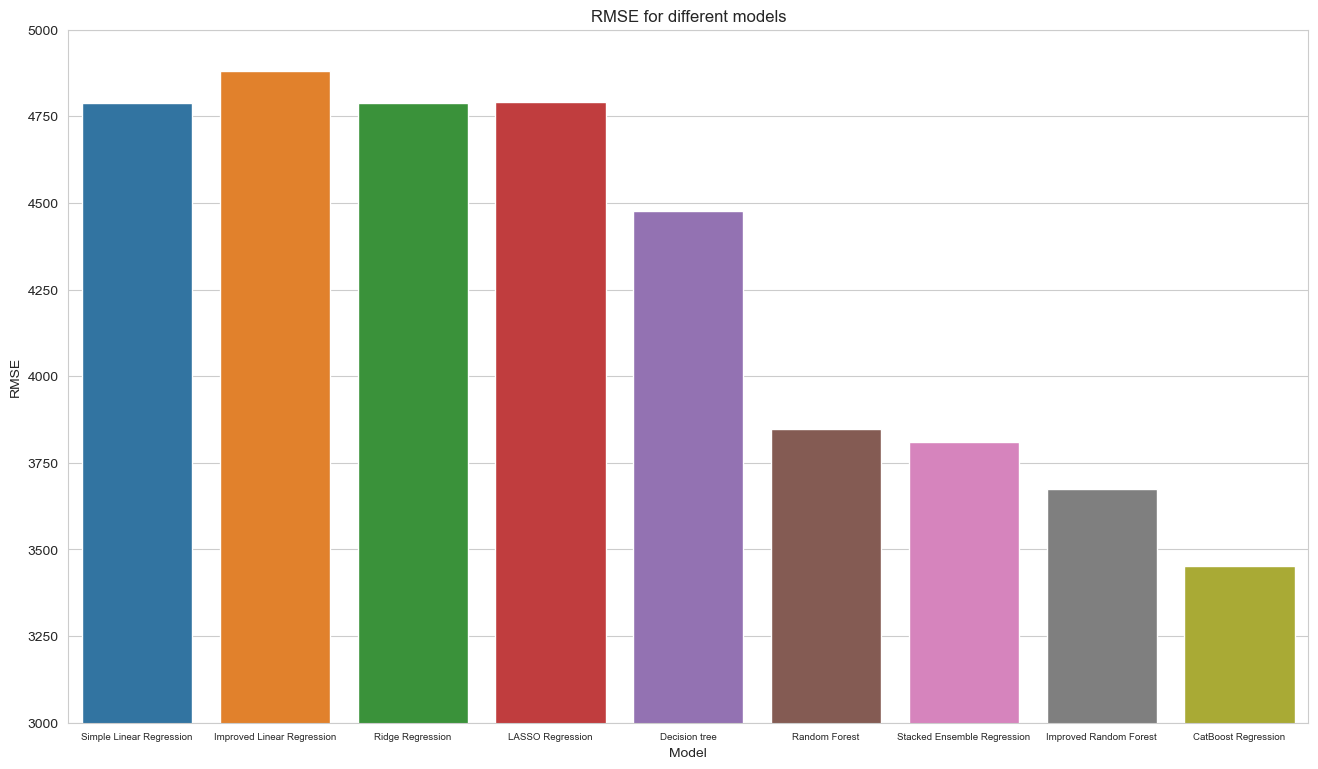

In [222]:
# Plot RMSE performance of all models:
fig, ax = plt.subplots( figsize = (16,9) )
sns.barplot(data = result_df, x='Model', y='RMSE')
ax.set_xlabel("Model")
ax.set_ylim(3000, 5000)
ax.tick_params(axis='x', which='major', labelsize=7)
ax.set_title("RMSE for different models")

Next, the $r^2$ scores:

Text(0.5, 1.0, '$r^2$ for different models')

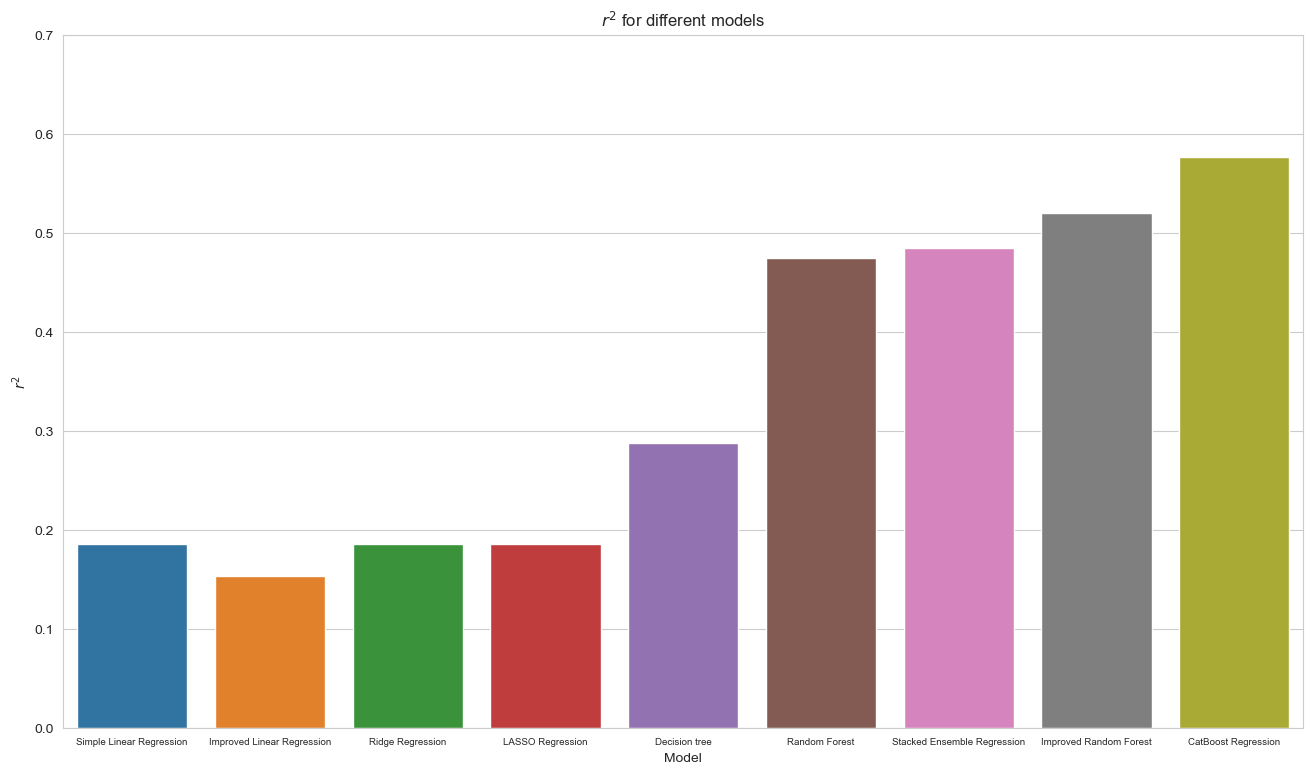

In [223]:
# Plot R2 performance of all models:
fig, ax = plt.subplots( figsize = (16,9) )
sns.barplot(data = result_df, x='Model', y='R2')
ax.set_xlabel("Model")
ax.set_ylabel(f"$r^2$")
ax.set_ylim(0, 0.7)
ax.tick_params(axis='x', which='major', labelsize=7)
ax.set_title(f"$r^2$ for different models")

When considering both metrics from the figures, we see clearly that our best performing model is the CatBoost regression, followed closely by our Improved Random Forest model

<a id="eight"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section we will give a more detailed description on how the best performing models functions in a simple way so that both technical and non-technical readers can grasp the intuition behind the model's inner workings. |

---

We will give a brief but thorough breakdown of our 2 most successful models, namely that of the Random forest and CatBoost regression models

### 8.1 Random Forest
Since Random Forest models are basically a collection of decision trees, it would be useful and beneficial to review what those are. 

Below is a diagram showing the conceptual structure of a decision tree, taken from the [following](https://github.com/Explore-AI/Pictures) public github repository. _Credit to the Explore AI Academy_

<img src="https://github.com/Explore-AI/Pictures/blob/master/decision_tree_diag.png?raw=true" alt="Decision Tree Diagram" align="left" width=50%/>





Decision trees split the data into 2 distinct groups based on a simple simple yes or no question regarding a variable in the dataset. A single instance of this happening, is known as a decision node. The process then repeats a predetermined amount of times, after which each node remaining is known as a terminal node, which is used to make a prediction regarding the data. For each potential set of variables given to the model, a singular path through the decision tree is followed in order to reach an estimation.

Decision trees are powerful methods to make predictions on a dataset, but can be prone to problems such as bias and overfitting. However, when we link multiple decision trees in a specific fashion, they predict more accurate results than any single decision tree does on its own. This is what we call a Random Forest model. Simply put, a Random Forest is a collection of decision trees, each trained on a random subset of our dataset. This random sampling of our data, is what is known as Bootstrapping. Each decision tree takes a portion of the dataset as it's training data, and returns that portion back to the pool of available data for the other trees. 

We also place another criteria on the decision trees that make up our Random Forest: At each decision node, we allow the decision tree access to only a portion of variables to consider. This portion we quantify as $m = \sqrt(p)$ where $p$ is the total amount of predictor variables in our dataset. The decision tree then picks the best splitting point according to what features it has access to. This applies to every decision tree in our random forest ensemble. All of those decision trees are trained in parallel. To produce a prediction from our random forest, we let every decision tree make a prediction, and take the average value of all those predictions as our final prediction. _Note, if we are dealing with a classification problem, we use voting from each tree rather that the average value_
The benefits of this type of model, is that it is non-parametric, meaning that we don't make any assumptions about our dataset, and how it relates to the target variable.  




## 8.2 CatBoost

Although the name might suggest something to do with a feline friend, the CatBoost model derives it's name form concatenating the words 'Category' and 'Boosting'. CatBoost is a powerful machine learning algorithm specifically designed for handling categorical features, which are variables with discrete values such as color, type, or category. It's often used for tasks like classification and regression, where the goal is to predict a category or a numerical value based on input data.

Where the Random Forest ensembled decision trees in a parallel way (_referred to as bagging_), this model links constituents in a sequential manner. (Image taken from the [following](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/) website. _Credit to Analytics Vidhya_)

<img src="https://av-eks-blogoptimized.s3.amazonaws.com/4661536426211ba43ea612c8e1a6a1ed4550721164.png" alt="Bagging Boosting" align="left" width=50%/>



During the training phase, CatBoost builds a collection of decision trees. Each tree is constructed by splitting the data based on certain rules to predict the target variable. The trees are built in an iterative manner, where each subsequent tree tries to correct the mistakes made by the previous ones. One of the key strengths of CatBoost is its ability to handle categorical features directly without requiring extensive preprocessing. It uses an algorithm called "ordered boosting" to automatically find the best way to transform categorical variables into numerical values while preserving their inherent structure. This helps CatBoost effectively utilize categorical information during training. Once all the decision trees are built, CatBoost combines their predictions to make a final prediction. Each tree gives its own prediction, and the predictions from all the trees are combined using a weighted average or a voting mechanism, depending on the task at hand (classification or regression).

<a id="nine"></a>
## 9. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

| ⚡ Description: Model Deployment ⚡ |
| :--------------------------- |
| In this section we explore our most important features, and make recommendations regarding expansion into renewable resources |


### 9.1 Extracting meaningful features

Since we have obtained our best performing model in terms of predictive abilities, we will extract the features most impactful on our target variable from it, in order to see what weather conditions results in the biggest changes in load shortfall : 

Text(0.5, 1.0, 'Feature Importance')

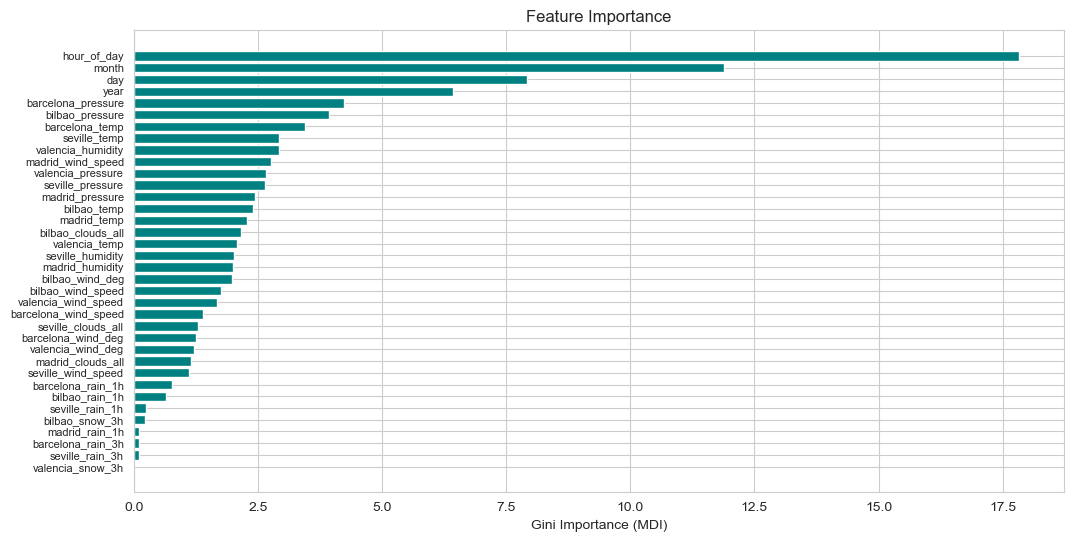

In [224]:
# Obtain feature importance scores
feature_importance =catboost.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Plot feature importances
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color='teal')
plt.yticks(range(len(sorted_idx)), np.array(x_catboost_validate.columns)[sorted_idx], fontsize = 8)
plt.xlabel('Gini Importance (MDI)')
plt.title('Feature Importance')

### 9.2 Key insights

From the image above, we obtain some very valuable insights: First of all, the most important features to predict the load shortfall, happened to be the features we created when we extracted the relevant data from our time variable. The hour of the day has the biggest impact on our renewable energy generated, followed by the month of the year. The day of the week is also crucial, and so is the year in which the data was recorded. All of these variables plays a large part in the renewable energy generated. From this dataset alone, it is difficult to say exactly why each of these variables have the impact that they do, but we can venture a few guesses:

The hour of the day is the biggest predictor, and will be considered first. Since solar power is exclusively generated during daytime hours, this implies that during the evenings, less renewable energy can be generated. Furthermore, wind speeds as a rule tends to decrease after sunset, making energy gathered by means of wind turbines less in the evenings. It is important to note that with the limited data we have access to, it is impossible to say concretely that these considerations are true, but they are the most likely cause of the load shortfall during nighttime hours

Next to consider, is the month of the year. This variable inherently contains another important feature, namely the season. Since the sun is more angled during winter times and the photons have more atmosphere to move through, solar power will be less effective during these times. 

Both of these considerations are to be expected, due to the inherent nature of solar power

The day feature is a bit surprising, but can most probably be explained by the fact that less renewable energy is generated on the weekends, as compared to during the weeks. This can either be due to the fact that the workers in certain renewable power plants take the weekends off, or it might be that there is less demand for power during the weekends, and therefore less renewable energy is generated as a whole, compared to that of fossil fuels. 

We should also consider the year as an important predictor in our model. Using only this data, it is impossible to say exactly why it has such an impact on our model, but most probably it is due to the fact that more renewable sources of energy was added to the grid as time progress.

Interestingly, the next best predictors of our load shortfall after our time dependent data, is the temperature and pressure conditions for most of our cities. Both of these variables plays a role on the generation power of solar cells, and solar energy as a whole. 


Also worth noting is the fact that the data regarding rainfall and snow had the least impact on load shortfall, and did little to aid our model predictions. This indicates that the load shortfall is not very affected by these variables. This can either be due to the fact that it does not rain and snow enough in Spain to have any significant impact on the generation of renewable energy, or that the current installed renewable sources is unaffected by rain and snow.

The most notable effects on the generation of renewable sources, comes from seasonal and daily cycles. These variables will have an affect on the effectiveness of energy generated by means of solar power, as well as wind power to a lesser degree. Since the wind speed and wind degree for most cities have a smaller effect on our model that some other features, we can either conclude that there is little wind-energy generated near these cities, or that the wind speed shows little variation in these locations and remains more constant than not.

### 9.3 Recommendations for expansion of renewable sources

All of the variables showing volatility in our model affects the installment of solar energy more than any other renewable counterpart. As such, solar energy may be less reliable in this region than other, more stable energy generation methods like wind power and hydro electricity. As such, expansion in wind and hydro energy is recommended above solar panels. 

<a id="ten"></a>
## 10. Appendix A: Model Deployment
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

| ⚡ Description: Model Deployment ⚡ |
| :--------------------------- |
| In this section, the data engineering for - and training of the model deployed on the web server will be shown |


This section contains the very rudimentary data engineering, as well as model fitting for the model deployed on our web server. The model that we deployed on our web server was that of a random forrest regression. To start off, we read our data from the file:

In [225]:
# Read the datasets into dataframes
df = pd.read_csv('df_train.csv')
df_test = pd.read_csv("df_test.csv")

The data cleaning was done in a very siple fashion, since we are less concerned with the predictive quality of our model than demonstrating the deployment of our model on a web server. First, we remove any features from our data that is not numeric:

In [226]:
# Create a list of numerical datatypes
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Filter dataframe to contain only numerical values
newdf = df.select_dtypes(include=numerics)


Next, we drop our redundant index feature `Unnamed :0`, and our feature `Valencia_pressure`  since it contains missing values 

In [227]:
# Remove troublesome features from dataset
newdf = newdf.drop('Valencia_pressure', axis = 'columns')
newdf = newdf.drop("Unnamed: 0", axis = 'columns')



Verifying that the features were dropped successfully:

In [228]:
# Display remaining features in dataset
cols = list(newdf)
print(cols)

['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id', 'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h']


Next, we split our data into the predictors and the target variable:

In [229]:
# Split data into features and target
x_deploy = newdf.drop('load_shortfall_3h', axis = 'columns')
y_deploy = newdf['load_shortfall_3h']

# Verify the change was made
x_deploy

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,0.666667,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.000000,223.333333,6.333333,42.666667,0.000000,3.333333,0.0,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.000000,800.0,1035.000000,800.000000,274.254667,971.333333,269.888000,269.888000,800.000000,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000
1,0.333333,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.000000,221.000000,4.000000,139.000000,0.000000,3.333333,0.0,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.000000,800.0,1035.666667,800.000000,274.945000,972.666667,271.728333,271.728333,800.000000,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667
2,1.000000,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.000000,214.333333,2.000000,326.000000,0.000000,2.666667,0.0,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.000000,800.0,1036.000000,800.000000,278.792000,974.000000,278.008667,278.008667,800.000000,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667
3,1.000000,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.000000,199.666667,2.333333,273.000000,0.000000,4.000000,0.0,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.000000,800.0,1036.000000,800.000000,285.394000,994.666667,284.899552,284.899552,800.000000,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219
4,1.000000,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.000000,185.000000,4.333333,260.000000,0.000000,3.000000,0.0,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.000000,800.0,1035.333333,800.000000,285.513719,1035.333333,283.015115,283.015115,800.000000,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1.000000,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,226.666667,1.666667,83.666667,45.000000,1.000000,0.0,0.0,0.0,1021.000000,0.0,0.0,0.0,0.0,727.666667,801.0,1017.666667,769.333333,285.483333,1024.000000,282.483333,282.483333,802.333333,285.076667,71.333333,282.483333,282.150000,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333
8759,5.000000,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,220.000000,3.000000,213.333333,85.000000,1.666667,0.0,0.0,0.0,1019.000000,0.0,0.0,0.0,0.0,762.000000,801.0,1015.333333,803.000000,288.483333,1023.666667,291.816667,291.816667,801.333333,287.673333,40.333333,291.816667,287.816667,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000
8760,6.333333,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,283.333333,5.333333,256.666667,85.000000,3.666667,0.0,0.0,0.0,1015.666667,0.0,0.1,0.0,0.0,702.333333,801.0,1017.333333,801.666667,291.483333,1021.666667,290.706333,290.706333,601.000000,290.070000,44.666667,290.706333,290.4

Finally, we fit a new random forrest regressor to the data, and save the model with the _pickle_ package:

In [230]:
# Initiate a new random forest model
deploy_random_forest = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42)

# Fit the model to the data
deploy_random_forest.fit(x_deploy,y_deploy)

# Choose a filename to save model as
model_save_path = 'RandomForrest_Deployment_VerySimple.pkl'

# Save model to specified filename
with open(model_save_path, 'wb') as file:
    pickle.dump(deploy_random_forest,file)